# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padrozinação de Gráficos, Visualizações e códigos;

- _Clean COde_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 29/11/2021;

- Monitoria do Projeto 1: 10/12/2021;

- Data de Entrega: 17/12/2021;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoALuno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

# Projeto 1 - Base de Dados Covid

#### 780_Projeto1_JohnnyHorita.ipynb

## Preparação dos Dados e Verificação de Consistência

Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de outliers entre outras;

### Importando bibliotecas

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
from collections import Counter
from pprint import pprint

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
#import plotly_express as px

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate

# Logistic Regression
from sklearn.linear_model import LogisticRegression 
# Support Vector Machine
from sklearn.svm import SVC 
# Naive Bayes (Gaussian, Multinomial)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
# KNN (k-nearest neighbor)
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# LGBM Classifier
from lightgbm import LGBMClassifier
# Ada Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
# Dummy Boosting Classifier
from sklearn.dummy import DummyClassifier

import shap

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


from IPython.core.display import HTML as Center
from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

### Padrões


In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

colors = sns.color_palette("pastel") # deep, pastel, Set1 Set2 Set3, icefire, tab10, muted, colorlind, coolwarm


In [3]:
Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

### Funções


In [4]:
# Função de avaliação dos valores de NaN no dataframe

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Valores faltantes', 1 : '% de Valores Totais'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% de Valores Totais', ascending=False).round(1)
        print ("O dataframe tem " + str(df.shape[1]) + " colunas e " + str(df.shape[0]) + " linhas.\n"      
            "Existem " + str(mz_table.shape[0]) +
              " colunas que têm valores faltantes.")
        mz_table.to_excel('missing_and_zero_values.xlsx', freeze_panes=(1,0), index = True)
        return mz_table


In [5]:
# Função de avaliação de modelos de aprendizagem de máquinas

def test_models_plot_roc_auc_curve(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(15,7))
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        y_predproba = model.predict_proba(X_test)[:,1]
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predproba)
        auc = metrics.roc_auc_score(y_test, y_predict)
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.4f)' % (mdl[col_model_name], auc))
        print("Model      : %s" % mdl[col_model_name])
        calc_predict(mdl[col_model_name], y_test, y_predict)
        
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
# Função de avaliação de modelos apresentação da matriz de confusão

def test_models_plot_confusion_matrix(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):

    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        print("")        
        print("=" * 55)        
        print("Model      : %s" % mdl[col_model_name])
        calc_predict(mdl[col_model_name], y_test, y_predict)
        
        cm = confusion_matrix(y_test, y_predict)
        cm_matrix = pd.DataFrame(data=cm, columns=['Atual Positivo:1', 'Atual Negativo:0'], 
                                         index=['Pred. Positivo:1', 'Pred. Negativo:0'])

        print('Matriz Confusão\n\n', cm)
        print('\nV. Positivos(VP) = ', cm[0,0])
        print('V. Negativos(VN) = ', cm[1,1])
        print('F. Positivos(FP) = ', cm[0,1])
        print('F. Negativos(FN) = ', cm[1,0])

        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
        plt.show()


In [7]:
# Função para cálcular as métricas 

def calc_predict(col_model_name, y_test, y_predict):
    print("ROC - AUC  : %0.4f " % metrics.roc_auc_score(y_test, y_predict))
    print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
    print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
    print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
    print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
    print("MAE        : %0.4f " % mean_absolute_error(y_test, y_predict))
    print("RMSE       : %0.4f " % np.sqrt(mean_squared_error(y_test, y_predict)))
    print("R2         : %0.4f " % r2_score(y_test, y_predict))
    print("")
    print(classification_report(y_test, y_predict))
    print("=" * 55)
    print("")


In [8]:
# Função para calcular a importância da variável no modelo
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    # Adequando as classes para treino
    alg.fit(dtrain[predictors], dtrain[target])
        
    # Previsão de saída para o conjunto de dados de teste
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    # Utilizando o Cross Validation
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Exibindo relatório:
    print (f"\nRelatório do Modelo {alg}")
    print ("\nAcuracia : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predictions))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Exibindo gráfico da importancia das variáveis
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Importância das variáveis', color=colors)
        plt.ylabel('Pontuação')


### Inicializando Dataframe


In [9]:
# Importando arquivo

df = pd.read_csv('./COVID.csv')


In [10]:
# Quantidade de linhas e colunas

qtl, qtc = df.shape

# Quantidade de linhas duplicadas

qtd, _ = df[df.duplicated(keep=False)].shape

print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtc}')


Quantidade de linhas...........: 499692
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 20


In [11]:
# Informações do dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           499692 non-null  int64  
 1   sex                  499692 non-null  int64  
 2   patient_type         499692 non-null  int64  
 3   intubed              107424 non-null  float64
 4   pneumonia            499681 non-null  float64
 5   age                  499692 non-null  int64  
 6   pregnancy            245258 non-null  float64
 7   diabetes             498051 non-null  float64
 8   copd                 498246 non-null  float64
 9   asthma               498250 non-null  float64
 10  inmsupr              498030 non-null  float64
 11  hypertension         498203 non-null  float64
 12  other_disease        497499 non-null  float64
 13  cardiovascular       498183 non-null  float64
 14  obesity              498222 non-null  float64
 15  renal_chronic    


---

**Conclusões:** 

O dataframe é composto por 20 colunas e 499.692 registros.

Na tabela acima são apresentados valores não preenchidos para algumas colunas que serão demonstrados ao longo do projeto.



In [12]:
# Lista de colunas do dataframe

df.columns


Index(['Unnamed: 0', 'sex', 'patient_type', 'intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [13]:
# Listagem das primeiras linhas do dataframe

df.head()


,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [14]:
# Avaliando os valores nulos do dataframe

missing_values_table(df)


O dataframe tem 20 colunas e 499692 linhas.
Existem 15 colunas que têm valores faltantes.


,Valores faltantes,% de Valores Totais,Data Type
icu,392269,78.5,float64
intubed,392268,78.5,float64
pregnancy,254434,50.9,float64
contact_other_covid,153675,30.8,float64
other_disease,2193,0.4,float64
inmsupr,1662,0.3,float64
diabetes,1641,0.3,float64
tobacco,1579,0.3,float64
cardiovascular,1509,0.3,float64
hypertension,1489,0.3,float64



---

**Conclusões:** 

A tabela acima apresenta o percentual de valores faltantes (não preenchidos - NaN) por coluna/variável.

Identificamos que 4 variáveis tem o maior percentual de valores faltantes:

- **icu**: Se o paciente precisou ser internado na UTI;
- **intubed**: Se o paciente foi intubado ou não;
- **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres);
- **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid;



---

**Tratamento de variáveis**

- Criação de uma nova variável **pregnancy_new**, onde os valores nulos (NaN) de pregnancy foram atualizados para 0, quando a variável sex for igual a 0 (Sexo do Paciente 0 - Homem / 1 - Mulher);<br>

    
- Criação de uma nova variável **icu_new**, onde os valores nulos (NaN) foram atualizados para 0, indicando que o paciente não foi internado na UTI;<br>


- Criação de uma nova variável **intubed_new**, onde os valores nulos (NaN) foram atualizados para 0, indicando que o paciente não foi intubado;<br>


- Criação de uma nova variável **contact_other_covid_new**, onde os valores nulos (NaN) foram atualizados para 0, indicando que o paciente não teve contato com pessoas diagnosticadas com covid;<br>


- Exclusão de variáveis que entendemos não ser relevante para diagnosticar o paciente ser positivo ou não para COVID<br>
    **Unnamed: 0**: Indice "auxiliar" do dataframe<br>
    

- Exclusão de variáveis tratadas<br>
    **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
    **icu**: Se o paciente precisou ser internado na UTI (Tem grande percentual de valores faltantes)<br>
    **intubed**: Se o paciente foi intubado ou não (Tem grande percentual de valores faltantes)<br>
    **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>


In [15]:
# pregnancy_new

# Criação de uma nova variável pregnancy_new, 
# onde os valores nulos (NaN) de pregnancy foram atualizados para 0, 
# quando a variável sex for igual a 0 (Sexo do Paciente 0 - Homem / 1 - Mulher)
    
# Criando variável pregnancy_new
df['pregnancy_new'] = np.where(df['sex'] == 0, 0, df['pregnancy'])

print (f'pregnancy_new - Percentual de valores NaN: {100 * df["pregnancy_new"].isnull().sum() / len(df):.2f}%')


pregnancy_new - Percentual de valores NaN: 0.27%


In [16]:
# icu_new

# Criação de uma nova variável icu_new, 
# onde os valores nulos (NaN) foram atualizados para 0
    
# Criando variável icu_new
df['icu_new'] = df['icu'].replace(np.nan, 0)

print (f'icu_new - Percentual de valores NaN: {100 * df["icu_new"].isnull().sum() / len(df):.2f}%')


icu_new - Percentual de valores NaN: 0.00%


In [17]:
# intubed_new

# Criação de uma nova variável intubed_new, 
# onde os valores nulos (NaN) foram atualizados para 0
    
# Criando variável intubed_new
df['intubed_new'] = df['intubed'].replace(np.nan, 0)

print (f'intubed_new - Percentual de valores NaN: {100 * df["intubed_new"].isnull().sum() / len(df):.2f}%')


intubed_new - Percentual de valores NaN: 0.00%


In [18]:
# contact_other_covid_new

# Criação de uma nova variável contact_other_covid_new, 
# onde os valores nulos (NaN) foram atualizados para 0
    
# Criando variável intubed_new
df['contact_other_covid_new'] = df['contact_other_covid'].replace(np.nan, 0)

print (f'contact_other_covid_new - Percentual de valores NaN: {100 * df["contact_other_covid_new"].isnull().sum() / len(df):.2f}%')


contact_other_covid_new - Percentual de valores NaN: 0.00%


In [19]:
# Exclusão de variáveis que entendemos não ser relevante para o modelo

# Unnamed: 0: ;
# icu: Se o paciente precisou ser internado na UTI;
# intubed: Se o paciente foi intubado ou não;
# pregnancy: Se a paciente estava grávida ou não (para pacientes mulheres);
# contact_other_covid: Se o paciente teve contato com outras pessoas diagnosticadas com covid;

# Deleting columns
DeleteList=['Unnamed: 0', 'pregnancy', 'icu', 'intubed', 'contact_other_covid']

# Novo dataframe dfc (df copy)
dfc = df.drop(DeleteList, axis=1).copy()


In [20]:
# Avaliando os valores nulos do dataframe tratrado

missing_values_table(dfc)


O dataframe tem 19 colunas e 499692 linhas.
Existem 12 colunas que têm valores faltantes.


,Valores faltantes,% de Valores Totais,Data Type
other_disease,2193,0.4,float64
inmsupr,1662,0.3,float64
diabetes,1641,0.3,float64
tobacco,1579,0.3,float64
cardiovascular,1509,0.3,float64
hypertension,1489,0.3,float64
renal_chronic,1476,0.3,float64
obesity,1470,0.3,float64
copd,1446,0.3,float64
asthma,1442,0.3,float64


In [21]:
# Para melhorar o dataframe optamos em retirar todos os pacientes que estivesse com alguma variável Nula, 
# pois a perda de dados foi mínima baseada no cálculo de valores faltantes 

dfc.dropna(inplace=True)

# Reindexando os indices do dataframe
dfc.reset_index(drop=True, inplace=True)


In [22]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495068 entries, 0 to 495067
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sex                      495068 non-null  int64  
 1   patient_type             495068 non-null  int64  
 2   pneumonia                495068 non-null  float64
 3   age                      495068 non-null  int64  
 4   diabetes                 495068 non-null  float64
 5   copd                     495068 non-null  float64
 6   asthma                   495068 non-null  float64
 7   inmsupr                  495068 non-null  float64
 8   hypertension             495068 non-null  float64
 9   other_disease            495068 non-null  float64
 10  cardiovascular           495068 non-null  float64
 11  obesity                  495068 non-null  float64
 12  renal_chronic            495068 non-null  float64
 13  tobacco                  495068 non-null  float64
 14  covi

In [23]:
# Analisando os valores das variáveis do datraframe 

for col in dfc.columns:
    print(f'{col} : {dfc[col].unique()}')
    

sex : [0 1]
patient_type : [1 0]
pneumonia : [0. 1.]
age : [ 27  24  54  30  60  47  63  56  41  39  46  45  28  34  38  49  25  40
  61  31  33  52  83  43  77  37  32  53  42  57  48  59  44  65  73  71
  51  50  35  67  55  78  29  79  36  66  74  58  84  26  80   3  75  68
  87  69  89  76  62  18  23  70  17  72   0  81  64  88  20  15  22  14
  16  86  92  90  82   5   7  11  21  85  95  19   1   4  97  10  93   9
   8  12  13   6  91   2  98  96  94 100 119 101  99 103 114 106 102 116
 120 104 118 109 110 117 115 113 108 107 111]
diabetes : [0. 1.]
copd : [0. 1.]
asthma : [0. 1.]
inmsupr : [0. 1.]
hypertension : [0. 1.]
other_disease : [0. 1.]
cardiovascular : [0. 1.]
obesity : [0. 1.]
renal_chronic : [0. 1.]
tobacco : [0. 1.]
covid_res : [1 0]
pregnancy_new : [0. 1.]
icu_new : [0. 1.]
intubed_new : [0. 1.]
contact_other_covid_new : [0. 1.]


---
**Conclusões:** 

Analisando os valores contidos nas variáveis identificamos que tem apenas 2 valores, sendo 1 ou 0, com exceção da variável **age** que representa a idade dos pacientes.


In [24]:
# Alterando o tipo de dado de todas as colunas para int para diminuir o tamanho do dataframe

dfc = dfc.astype(int, errors='ignore').copy()


---

**Conclusões:** 

Optamos em padronizar o tipo de dados para inteiro (int32) diminuindo o tamanho da memória utilizada pelo dataframe.

dfc (antes)
memory usage: 71.8 MB

dfc (depois)
memory usage: 35.9 MB


In [25]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495068 entries, 0 to 495067
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   sex                      495068 non-null  int32
 1   patient_type             495068 non-null  int32
 2   pneumonia                495068 non-null  int32
 3   age                      495068 non-null  int32
 4   diabetes                 495068 non-null  int32
 5   copd                     495068 non-null  int32
 6   asthma                   495068 non-null  int32
 7   inmsupr                  495068 non-null  int32
 8   hypertension             495068 non-null  int32
 9   other_disease            495068 non-null  int32
 10  cardiovascular           495068 non-null  int32
 11  obesity                  495068 non-null  int32
 12  renal_chronic            495068 non-null  int32
 13  tobacco                  495068 non-null  int32
 14  covid_res                495068 non-

In [26]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape


print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')


Dataframe original - df
Quantidade de linhas...........: 499692
Quantidade de colunas..........: 20

Dataframe tratado - dfc
Quantidade de linhas...........: 495068
Quantidade de linhas duplicadas: 435991
Quantidade de colunas..........: 19

Percentual de registros retirados: 0.93%


In [27]:
# Verificando linhas duplicadas

# Seleciona as linhas duplicadas no dataframe baseado em todas as colunas
display(dfc[dfc.duplicated(keep='first')].sort_values(by=list(dfc.columns)))

print("\nLinhas duplicadas:")
print(dfc[dfc.duplicated()].shape[0])


,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,pregnancy_new,icu_new,intubed_new,contact_other_covid_new
221382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
222598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176707,1,1,1,87,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
197637,1,1,1,88,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
203255,1,1,1,90,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
451305,1,1,1,91,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1



Linhas duplicadas:
435991


---

**Conclusões:** 

Após tratamento do dataframe identifiquei que diversos pacientes apresentavam as mesmas caracteristicas para determinar se era ou não positivo para COVID, desta forma para melhorar o desempenho do processamento optei em retirar as linhas repetidas apesar de deixar uma amostra  baixa para a modelagem.


In [28]:
# Preparando os dataframes

# Criando copia do dataframe tratado para manter todos os registros 
dfc_copy = dfc.copy()

# Excluindo os linhas duplicadas
dfc = dfc.drop_duplicates(keep='first').copy()


In [29]:
# Quantidade de linhas e colunas

qtlc, qtcc = dfc.shape

# Quantidade de linhas duplicadas
qtd, _ = dfc[dfc.duplicated()].shape


print('Dataframe original - df')
print(f'Quantidade de linhas...........: {qtl}')
print(f'Quantidade de colunas..........: {qtc}')

print('\nDataframe tratado - dfc')
print(f'Quantidade de linhas...........: {qtlc}')
print(f'Quantidade de linhas duplicadas: {qtd}')
print(f'Quantidade de colunas..........: {qtcc}')

print (f'\nPercentual de registros retirados: {(100  * (qtl-qtlc) / qtl):.2f}%')

Dataframe original - df
Quantidade de linhas...........: 499692
Quantidade de colunas..........: 20

Dataframe tratado - dfc
Quantidade de linhas...........: 59077
Quantidade de linhas duplicadas: 0
Quantidade de colunas..........: 19

Percentual de registros retirados: 88.18%


---

**Conclusões:** 

Tratamos a variável **pregnancy** para criar a nova variável **pregnancy_new**, onde os valores nulos (NaN) de pregnancy foram atualizados para 0 quando a variável **sex** for igual a 0 (homem).<br>


Tratamos a variável **icu** para criar a nova variável **icu_new**, onde os valores nulos (NaN) foram atualizados para 0.<br>


Tratamos a variável **intubed** para criar a nova variável **intubed_new**, onde os valores nulos (NaN) foram atualizados para 0.<br>


Tratamos a variável **contact_other_covid** para criar a nova variável **contact_other_covid_new**, onde os valores nulos (NaN) foram atualizados para 0.<br>


Criamos um novo dataframe **dfc**, retirando as variáveis **Unnamed: 0, pregnancy, icu, intubed, contact_other_covid**, pois  a variável **Unnamed: 0** não é relevante para a detecção do COVID e as demais foram tratadas e substituidas por novas variáveis.


Retiramos todos os registros que estivessem com alguma variável não preenchida (NaN) para manter o máximo de informações no dataframe.


Com esses tratamentos acreditamos que o novo dataframe esta melhor preparado para análise exploratória de dados e modelagem.


## Análise Exploratória dos Dados

Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram análises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaçõeos sobre as variáveis em si e suas relações com as demais;

In [30]:
# Informações do dataframe

dfc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59077 entries, 0 to 495064
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   sex                      59077 non-null  int32
 1   patient_type             59077 non-null  int32
 2   pneumonia                59077 non-null  int32
 3   age                      59077 non-null  int32
 4   diabetes                 59077 non-null  int32
 5   copd                     59077 non-null  int32
 6   asthma                   59077 non-null  int32
 7   inmsupr                  59077 non-null  int32
 8   hypertension             59077 non-null  int32
 9   other_disease            59077 non-null  int32
 10  cardiovascular           59077 non-null  int32
 11  obesity                  59077 non-null  int32
 12  renal_chronic            59077 non-null  int32
 13  tobacco                  59077 non-null  int32
 14  covid_res                59077 non-null  int32
 15  p

In [31]:
# Listagem das primeiras linhas do dataframe

dfc.head()


,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,pregnancy_new,icu_new,intubed_new,contact_other_covid_new
0,0,1,0,27,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,24,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,54,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,60,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0



---

**Analisando covid_res (Target)**

- covid_res: Se o resultado do teste foi Positivo ou Negativo



In [32]:
# Quantidade de pacientes com testes de Covid Positivo e Negativo

Counter(dfc['covid_res'])


Counter({1: 29925, 0: 29152})

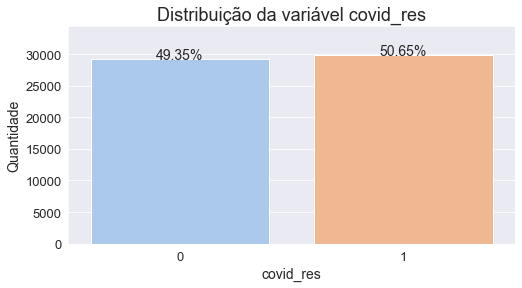

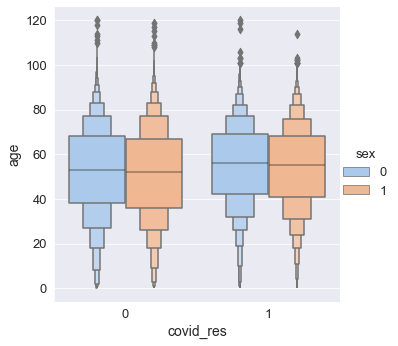

In [33]:
# Analisando a variavel covid_res 

col = 'covid_res'

total = len(dfc)

plt.figure(figsize=(8,4))
g = sns.countplot(x=col, data=dfc, palette=colors)
g.set_title(f"Distribuição da variável {col}")
g.set_xlabel(f"{col}")
g.set_ylabel("Quantidade")
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15)
plt.show()

g = sns.catplot(x=col, y="age", hue="sex", kind="boxen", data=dfc, palette=colors)
plt.show()


---

**Conclusões:** 

Analisando a variável **covid_res** podemos constatar que o nosso dataframe contém quantidades de pacientes positivos e negativos balanceados, diminuindo a tendência do modelo para algum dos resultados.



---

**Analisando variáveis**



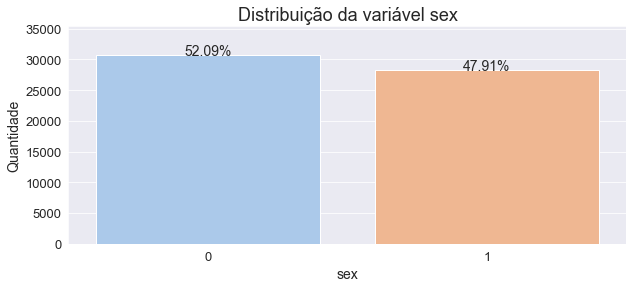

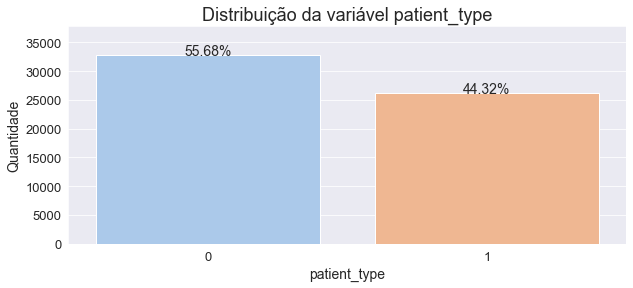

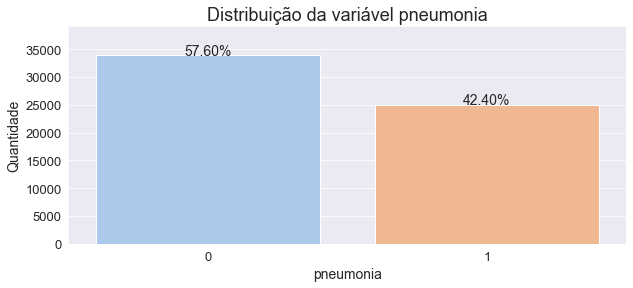

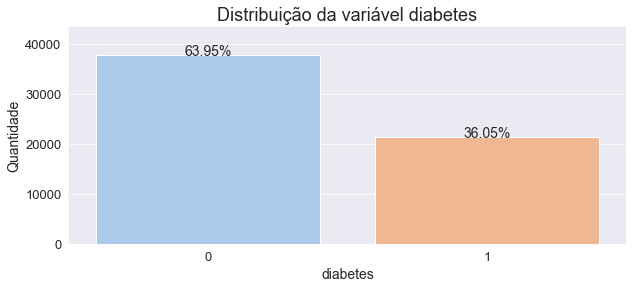

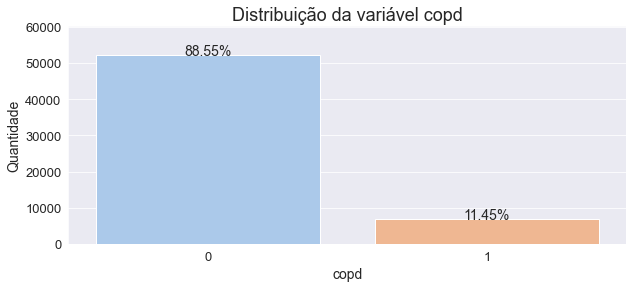

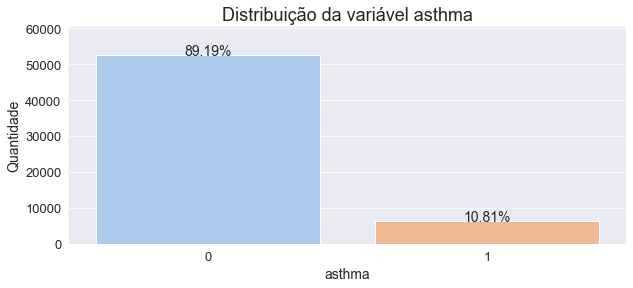

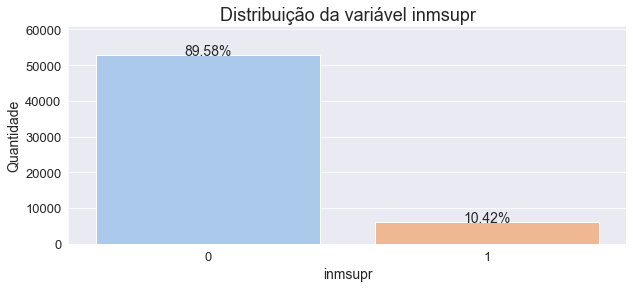

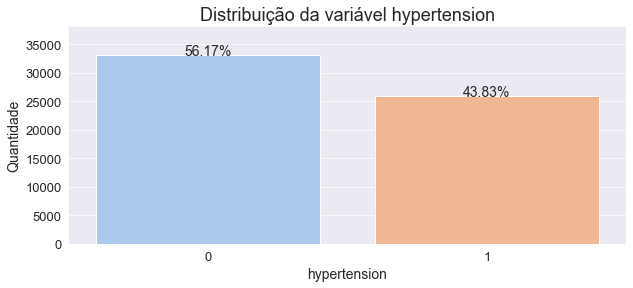

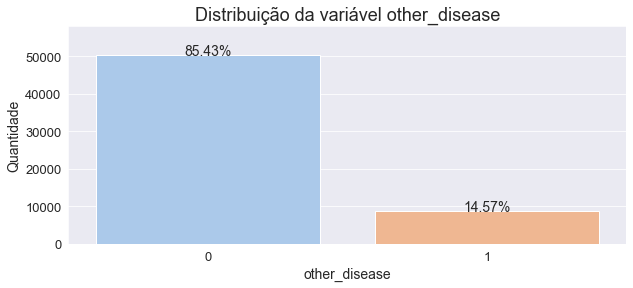

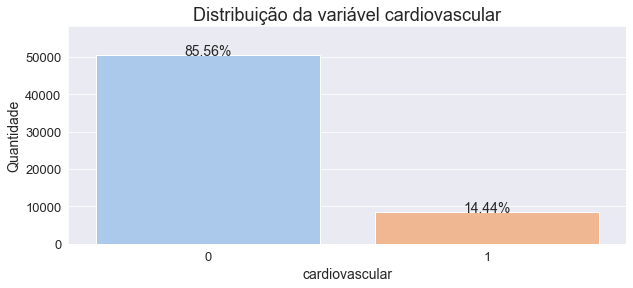

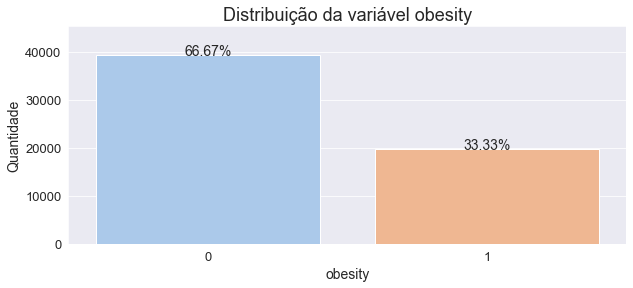

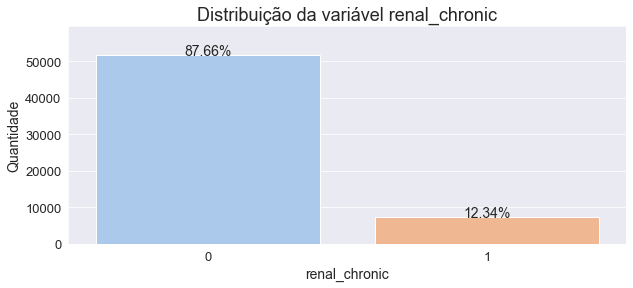

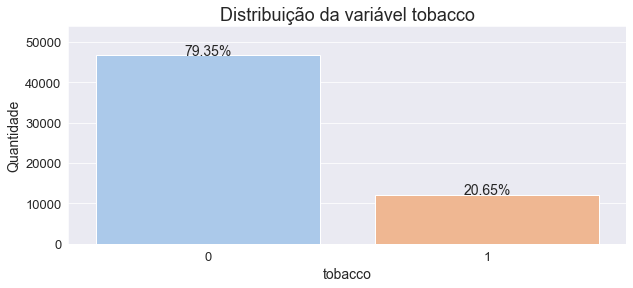

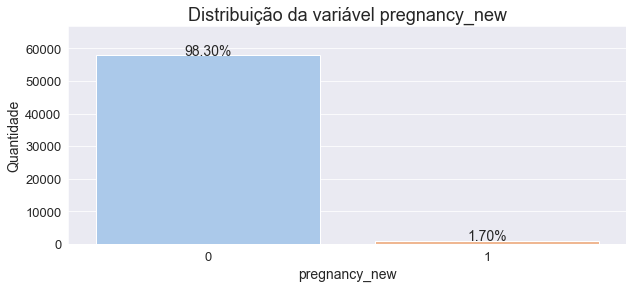

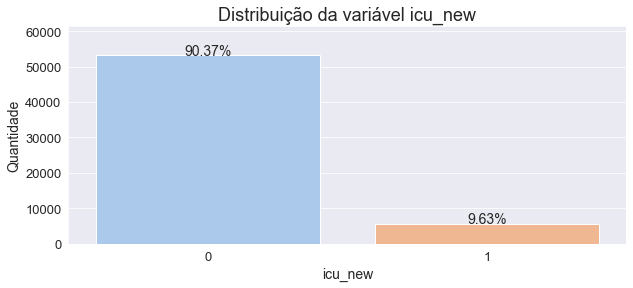

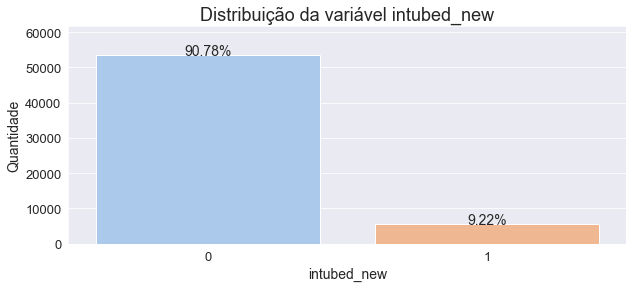

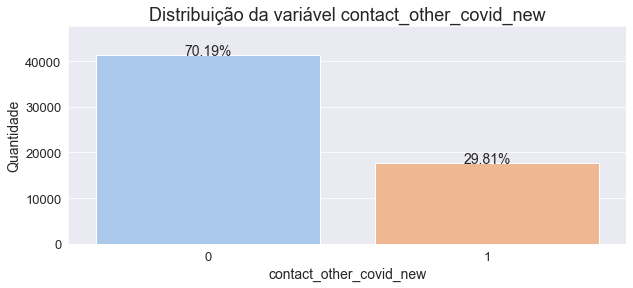

In [34]:
# Analisando os valores das variáveis do datraframe 

#col_filtered = dfc.columns.tolist()
#col_filtered.remove('age')

# itens que serão removidos
unwanted = {'age', 'covid_res'}
col_filtered = [e for e in dfc.columns.tolist() if e not in unwanted]

total = len(dfc)

for col in col_filtered:
    plt.figure(figsize=(10,4))
    g = sns.countplot(x=col, data=dfc, palette=colors)
    g.set_title(f"Distribuição da variável {col}")
    g.set_xlabel(f"{col}")
    g.set_ylabel("Quantidade")

    sizes=[]
        
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format((height/total)*100),
                ha="center", fontsize=14) 

    g.set_ylim(0, max(sizes) * 1.15)

    plt.show()


---

**Conclusões:** 

De modo geral a maioria das variáveis estão desbalanceadas quando são comparadas unitariamente, que podem definir caracteristicas especificas de grupos de pacientes.

- **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher)<br>
    A amostra esta balanceada apresentando diferença de 5%<br>
    
    
- **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0)<br>
    A amostra esta balanceada apresentando diferença de 10%<br>
    

- **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
    A amostra esta balanceada apresentando diferença de 15%<br>


- **diabetes**: Se o paciente tem diabetes ou não<br>
    A amostra tem tendência maior a não diabete apresentando diferença de 25%<br>


- **copd**: Se opaciente tem COPD ou não<br>
    A amostra esta desbalanceada tem tendência maior não COPD apresentando diferença de 77%<br>
    

- **asthma**: Se o paciente tem Asma ou não<br>
    A amostra esta desbalanceada tem tendência maior não Asma apresentando diferença de 79%<br>
    

- **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
    A amostra esta desbalanceada tem tendência maior não Imunosupressão apresentando diferença de 79%<br>
    
    
- **hypertension**: Se o paciente tem hipertensão ou não<br>
    A amostra esta balanceada apresentando diferença de 13%<br>


- **ohter_disease**: Se o paciente tem outras doenças ou não<br>
    A amostra esta desbalanceada tem tendência maior não ohter_disease apresentando diferença de 70%<br>


- **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
    A amostra esta desbalanceada tem tendência maior não cardiovascular apresentando diferença de 70%<br>


- **obesity**: Se o paciente tem obesidade ou não<br>
    A amostra esta desbalanceada tem tendência maior não obesity apresentando diferença de 70%<br>


- **renal_chronic**: Se o paciente tem problemas renais ou não<br>
    A amostra esta desbalanceada tem tendência maior não renal_chronic apresentando diferença de 75%<br>
    

- **tobacco**: Se o paciente é fumante ou não<br>
    A amostra esta desbalanceada tem tendência maior não tobacco apresentando diferença de 60%<br>
    

- **pregnancy_new**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
    A amostra esta desbalanceada tem tendência maior não pregnancy apresentando diferença de 97%<br>
    

- **icu_new**: Se o paciente precisou ser internado na UTI<br>
    A amostra esta desbalanceada tem tendência maior não icu apresentando diferença de 80%<br>
    

- **intubed_new**: Seo paciente foi intubado ou não<br>
    A amostra esta desbalanceada tem tendência maior não intubed apresentando diferença de 80%<br>


- **contact_other_covid_new**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
    A amostra esta desbalanceada tem tendência maior não contact_other_covid apresentando diferença de 40%<br>
    


---

**Distribuição das variáveis agrupadas por sexo e idade**


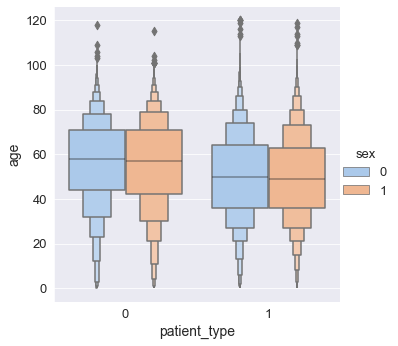

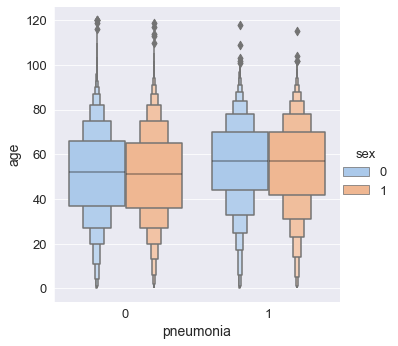

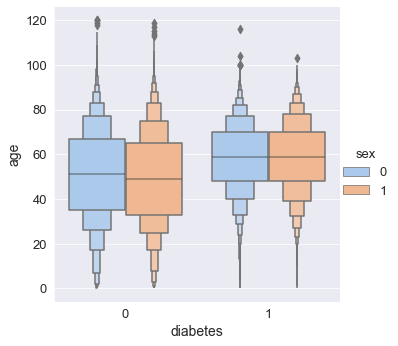

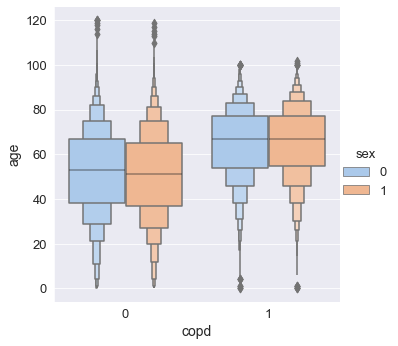

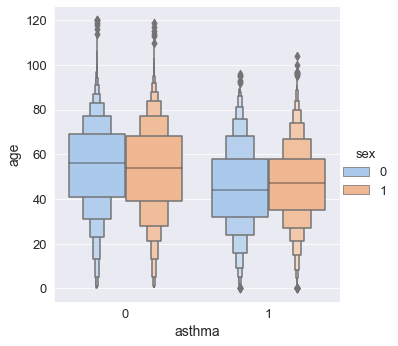

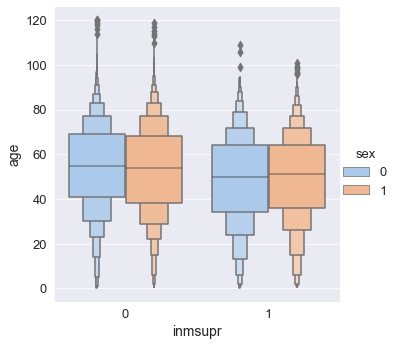

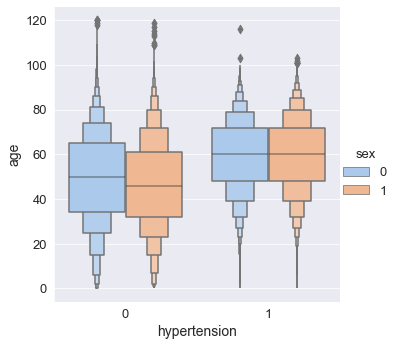

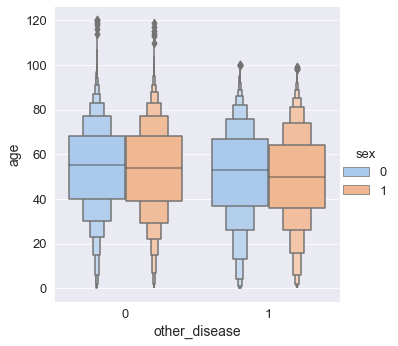

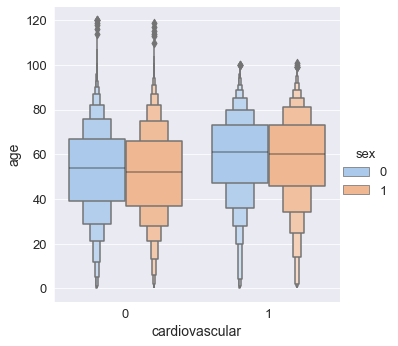

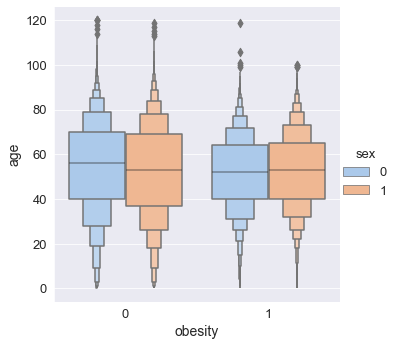

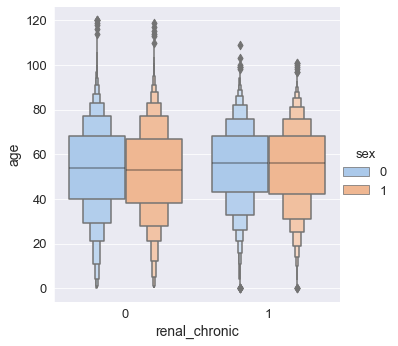

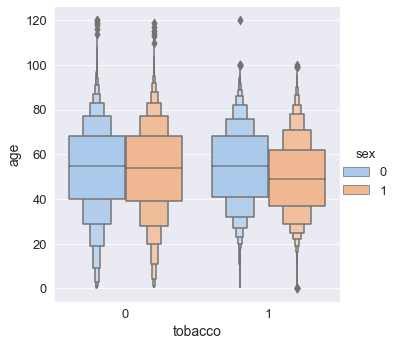

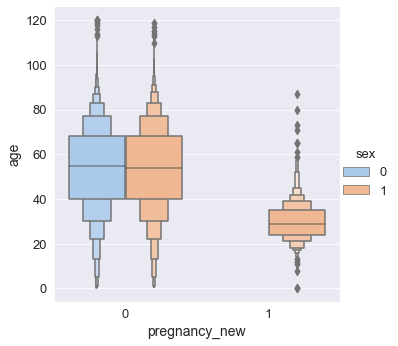

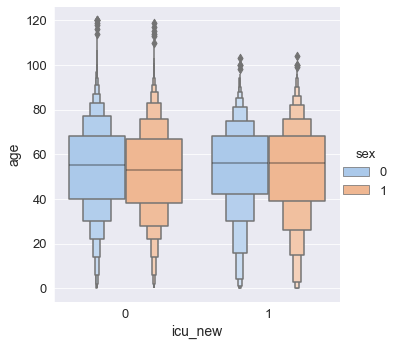

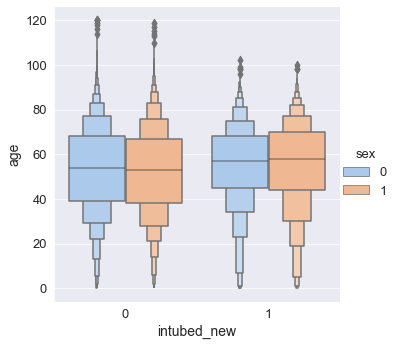

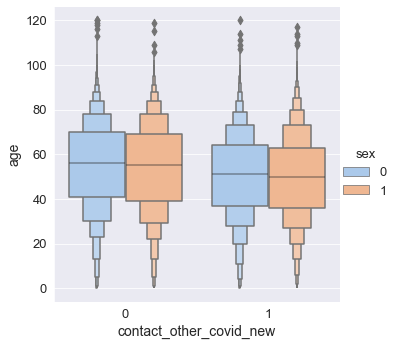

In [35]:
# Analisando os valores das variáveis do datraframe 

# itens que serão removidos
unwanted = {'age', 'sex', 'covid_res'}
col_filtered = [e for e in dfc.columns.tolist() if e not in unwanted]

for col in col_filtered:
    #plt.figure(figsize=(12,6))
    g = sns.catplot(x=col, y="age", hue="sex", kind="boxen", palette=colors, data=dfc)
    plt.show()

---

Analisando correlação entre as variáveis


In [36]:
# "Filtrando" o percentual de correlação do dataframe

dfCorr = dfc.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]


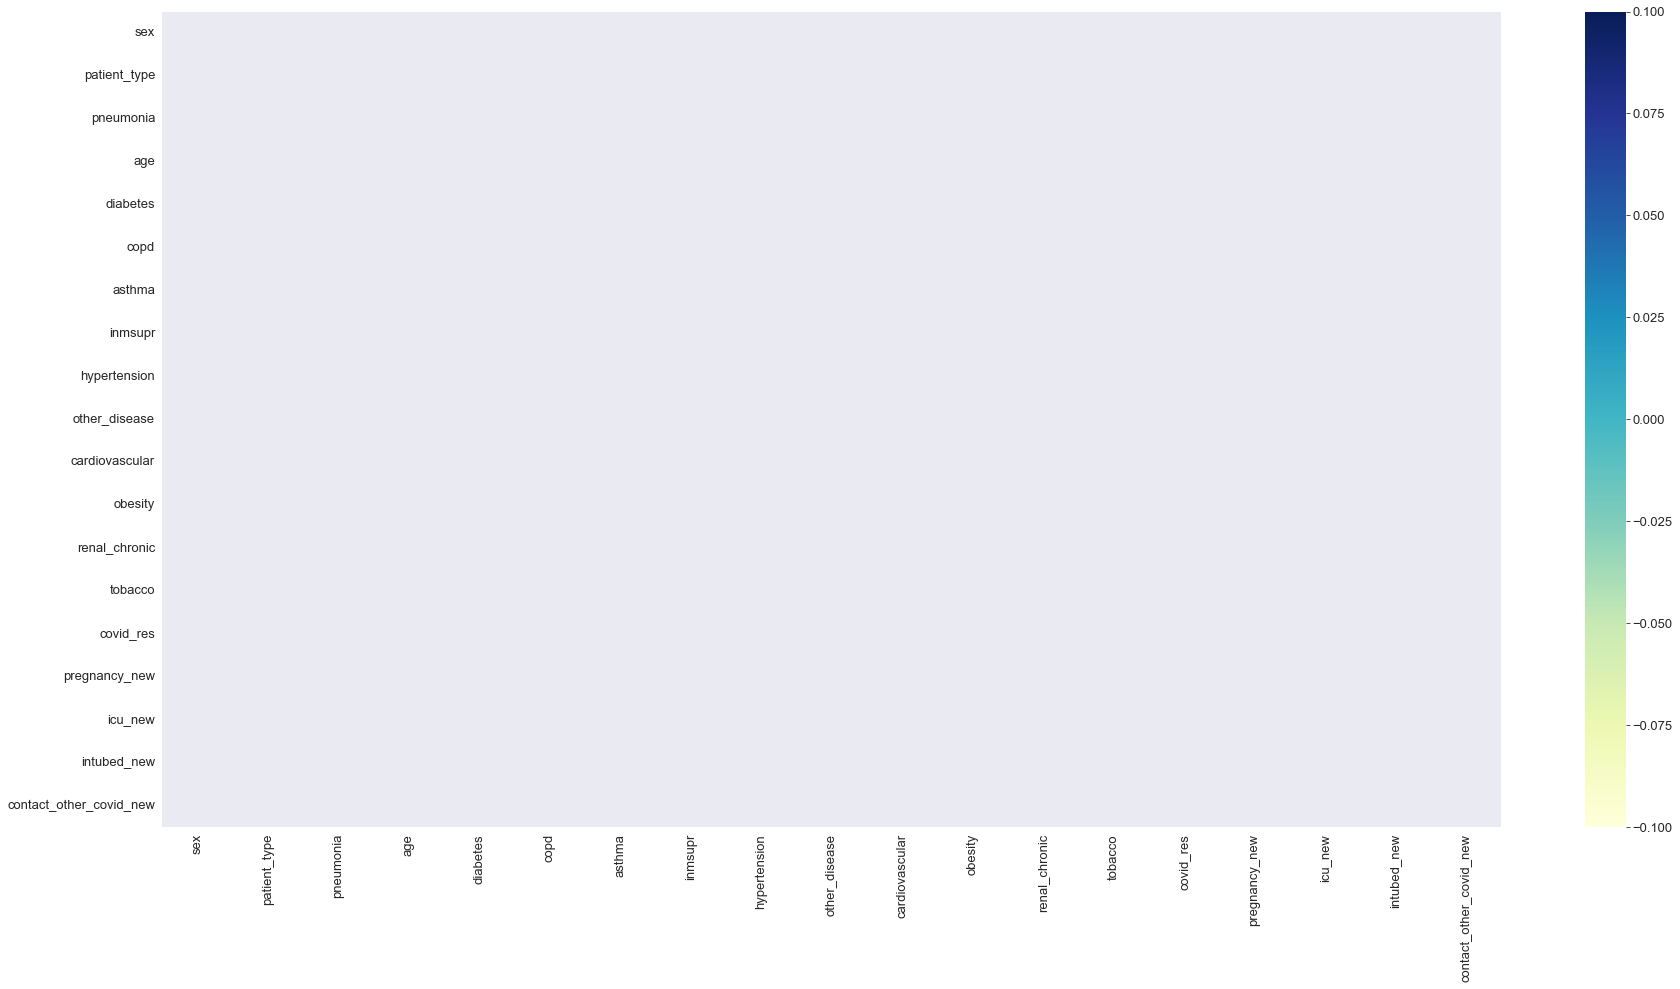

In [37]:
# Verificando a correlação entre as variáveis com heatmap

plt.figure(figsize=(30,15))
sns.heatmap(filteredDf, annot=True, cmap="YlGnBu")
#plt.savefig("Plotting_Correlation_heatmap_w.jpg")
plt.show()


---

**Conclusões:** 

Utilizado a função de correlação a figura não apresenta correlação entre as variáveis.


## Modelagem dos Dados

Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). Vocês deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocês), decidir qual será o melhor modelo a ser utilizado!;


### Separando conjunto de dados Treino e Teste

In [38]:
# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 

X = dfc.drop(['covid_res'], axis = 1)
y = dfc['covid_res']


In [39]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo

random_seed = 42
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)


In [40]:
# A padronização de um conjunto de dados é um requisito comum a muitos estimadores de aprendizagem de máquinas: 
# podem comportar-se mal se as características individuais não se parecerem mais ou menos com dados distribuídos normalmente.

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


In [41]:
# Quantidade total da variável "target" (covid_res)

y.value_counts().sort_index()


0    29152
1    29925
Name: covid_res, dtype: int64

In [42]:
# Quantidade separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


0    20400
1    20953
Name: covid_res, dtype: int64

In [43]:
# Quantidade separada para o conjunto de teste inicial

y_test.value_counts().sort_index()#(normalize = True)


0    8752
1    8972
Name: covid_res, dtype: int64

### Processando Modelos

**Processando modelo Dummy para métrica inicial**

In [44]:
# Lista de modelos

list_models = [
{'model_name': 'Dummy Classifier stratified',
 'estimator' : DummyClassifier(strategy='stratified', random_state=random_seed)}
#{'model_name': 'Dummy Classifier most_frequent',
# 'estimator' : DummyClassifier(strategy='most_frequent', random_state=random_seed)},
#{'model_name': 'Dummy Classifier prior',
# 'estimator' : DummyClassifier(strategy='prior', random_state=random_seed)},
#{'model_name': 'Dummy Classifier uniform',
# 'estimator' : DummyClassifier(strategy='uniform', random_state=random_seed)}
]


Model      : Dummy Classifier stratified
ROC - AUC  : 0.4993 
Accuracy   : 0.4994 
Precision  : 0.4993 
Recall     : 0.4994 
F1 - Score : 0.4993 
MAE        : 0.5006 
RMSE       : 0.7075 
R2         : -1.0028 

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      8752
           1       0.51      0.51      0.51      8972

    accuracy                           0.50     17724
   macro avg       0.50      0.50      0.50     17724
weighted avg       0.50      0.50      0.50     17724




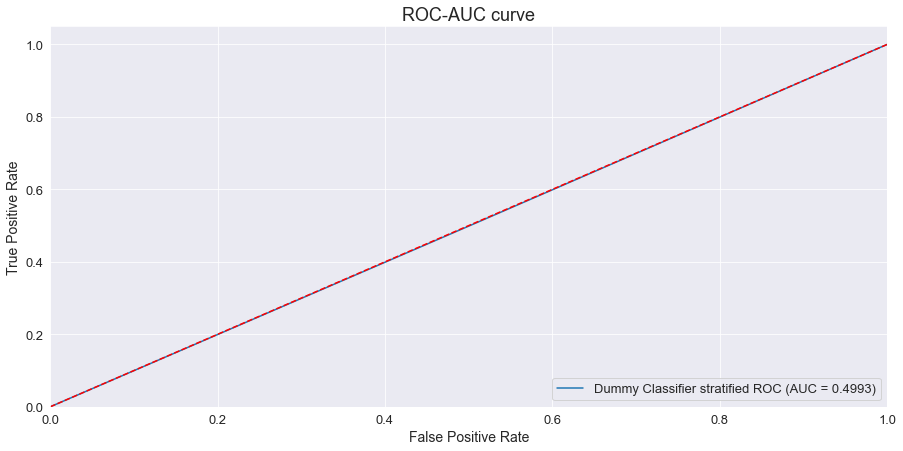

In [45]:
# Processando os modelos baseado na list_models

test_models_plot_roc_auc_curve(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)


**Processando modelos para classificação**

In [46]:

list_models = [
{'model_name': 'Dummy Classifier stratified',
 'estimator' : DummyClassifier(strategy='stratified', random_state=random_seed)},   
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state=random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state=random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state=random_seed)},
{'model_name': 'GradientBoosting',
 'estimator' : GradientBoostingClassifier(random_state=random_seed)},
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(random_state=random_seed)},
{'model_name': 'LightGBM',
 'estimator' : LGBMClassifier(random_state=random_seed)},
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state=random_seed)},
{'model_name': 'Naive Bayes Gaussian',
 'estimator' : GaussianNB()},
{'model_name': 'Stochastic Gradient Descent Classifier',
 'estimator' : SGDClassifier(loss='modified_huber',random_state=random_seed)}

# Estes modelos foram retirados devido ao longo tempo de processamento    
#{'model_name': 'Support Vector Machine',
# 'estimator' : SVC(random_state=random_seed)},
#{'model_name': 'KNN (k-nearest neighbor)',
# 'estimator' : KNeighborsClassifier(n_neighbors=3)},
]


Model      : Dummy Classifier stratified
ROC - AUC  : 0.4993 
Accuracy   : 0.4994 
Precision  : 0.4993 
Recall     : 0.4994 
F1 - Score : 0.4993 
MAE        : 0.5006 
RMSE       : 0.7075 
R2         : -1.0028 

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      8752
           1       0.51      0.51      0.51      8972

    accuracy                           0.50     17724
   macro avg       0.50      0.50      0.50     17724
weighted avg       0.50      0.50      0.50     17724


Model      : Decision Tree
ROC - AUC  : 0.3603 
Accuracy   : 0.3598 
Precision  : 0.3592 
Recall     : 0.3598 
F1 - Score : 0.3586 
MAE        : 0.6402 
RMSE       : 0.8001 
R2         : -1.5612 

              precision    recall  f1-score   support

           0       0.37      0.40      0.38      8752
           1       0.35      0.32      0.33      8972

    accuracy                           0.36     17724
   macro avg       0.36      0.36      0.36   

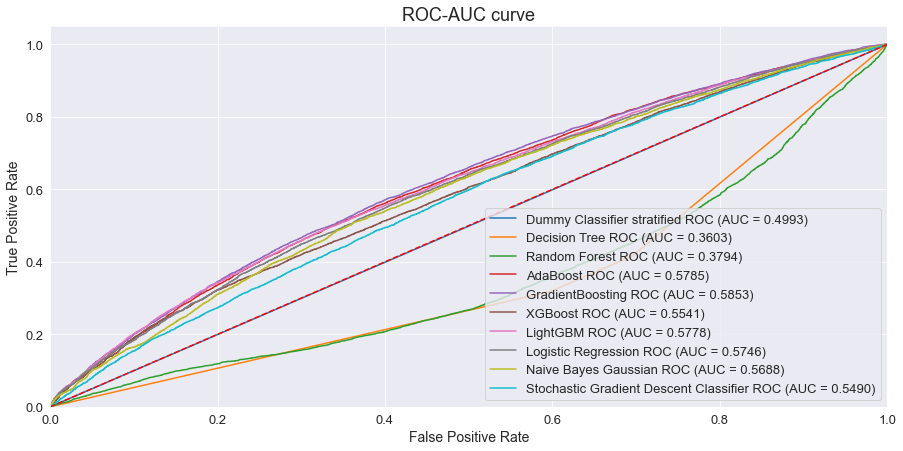

In [47]:
# 

test_models_plot_roc_auc_curve(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)



---

**Conclusões:** 

O processo acima retorna informações de cálculos dos modelos de aprendizado de máquina e apresenta um gráfico com as curvas da métrica ROC-AUC.

**ROC - Receiver Operating Characteristic**<br>
A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.


**AUC - Area under the (ROC) curve**<br>
O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5, ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.<br>
AUC, nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

**The winner is...**
GradientBossting

**Processando Matriz de Confusão**


Model      : Dummy Classifier stratified
ROC - AUC  : 0.4993 
Accuracy   : 0.4994 
Precision  : 0.4993 
Recall     : 0.4994 
F1 - Score : 0.4993 
MAE        : 0.5006 
RMSE       : 0.7075 
R2         : -1.0028 

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      8752
           1       0.51      0.51      0.51      8972

    accuracy                           0.50     17724
   macro avg       0.50      0.50      0.50     17724
weighted avg       0.50      0.50      0.50     17724


Matriz Confusão

 [[4281 4471]
 [4402 4570]]

V. Positivos(VP) =  4281
V. Negativos(VN) =  4570
F. Positivos(FP) =  4471
F. Negativos(FN) =  4402


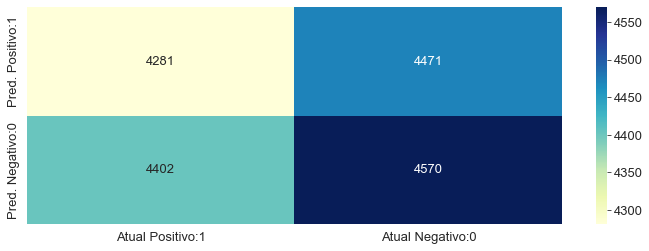


Model      : Decision Tree
ROC - AUC  : 0.3603 
Accuracy   : 0.3598 
Precision  : 0.3592 
Recall     : 0.3598 
F1 - Score : 0.3586 
MAE        : 0.6402 
RMSE       : 0.8001 
R2         : -1.5612 

              precision    recall  f1-score   support

           0       0.37      0.40      0.38      8752
           1       0.35      0.32      0.33      8972

    accuracy                           0.36     17724
   macro avg       0.36      0.36      0.36     17724
weighted avg       0.36      0.36      0.36     17724


Matriz Confusão

 [[3522 5230]
 [6117 2855]]

V. Positivos(VP) =  3522
V. Negativos(VN) =  2855
F. Positivos(FP) =  5230
F. Negativos(FN) =  6117


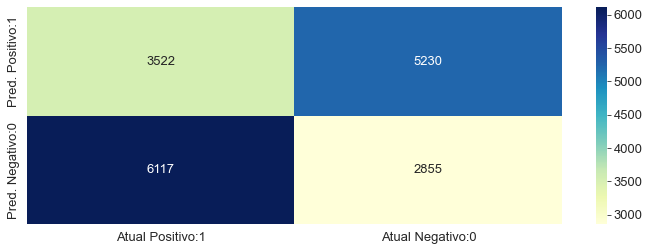


Model      : Random Forest
ROC - AUC  : 0.3794 
Accuracy   : 0.3794 
Precision  : 0.3795 
Recall     : 0.3794 
F1 - Score : 0.3794 
MAE        : 0.6206 
RMSE       : 0.7878 
R2         : -1.4827 

              precision    recall  f1-score   support

           0       0.37      0.37      0.37      8752
           1       0.39      0.38      0.39      8972

    accuracy                           0.38     17724
   macro avg       0.38      0.38      0.38     17724
weighted avg       0.38      0.38      0.38     17724


Matriz Confusão

 [[3277 5475]
 [5524 3448]]

V. Positivos(VP) =  3277
V. Negativos(VN) =  3448
F. Positivos(FP) =  5475
F. Negativos(FN) =  5524


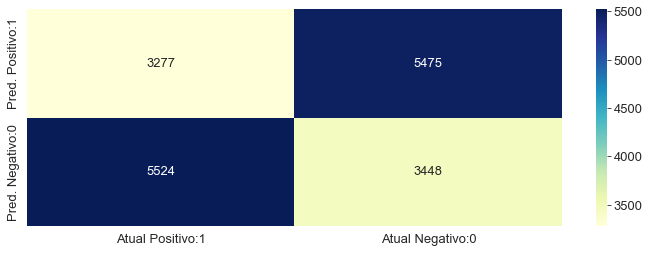


Model      : AdaBoost
ROC - AUC  : 0.5785 
Accuracy   : 0.5787 
Precision  : 0.5786 
Recall     : 0.5787 
F1 - Score : 0.5786 
MAE        : 0.4213 
RMSE       : 0.6491 
R2         : -0.6857 

              precision    recall  f1-score   support

           0       0.57      0.56      0.57      8752
           1       0.58      0.59      0.59      8972

    accuracy                           0.58     17724
   macro avg       0.58      0.58      0.58     17724
weighted avg       0.58      0.58      0.58     17724


Matriz Confusão

 [[4929 3823]
 [3645 5327]]

V. Positivos(VP) =  4929
V. Negativos(VN) =  5327
F. Positivos(FP) =  3823
F. Negativos(FN) =  3645


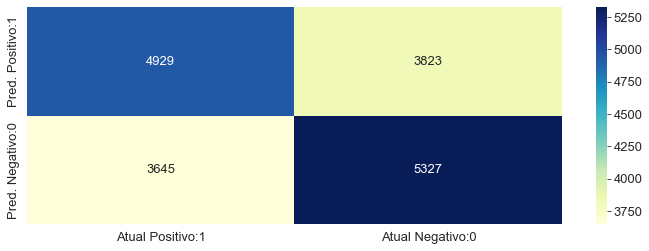


Model      : GradientBoosting
ROC - AUC  : 0.5853 
Accuracy   : 0.5850 
Precision  : 0.5857 
Recall     : 0.5850 
F1 - Score : 0.5847 
MAE        : 0.4150 
RMSE       : 0.6442 
R2         : -0.6604 

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      8752
           1       0.60      0.56      0.58      8972

    accuracy                           0.58     17724
   macro avg       0.59      0.59      0.58     17724
weighted avg       0.59      0.58      0.58     17724


Matriz Confusão

 [[5359 3393]
 [3963 5009]]

V. Positivos(VP) =  5359
V. Negativos(VN) =  5009
F. Positivos(FP) =  3393
F. Negativos(FN) =  3963


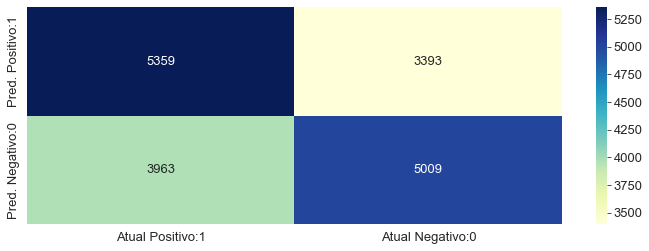

[15:44:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Model      : XGBoost
ROC - AUC  : 0.5541 
Accuracy   : 0.5541 
Precision  : 0.5541 
Recall     : 0.5541 
F1 - Score : 0.5541 
MAE        : 0.4459 
RMSE       : 0.6678 
R2         : -0.7838 

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      8752
           1       0.56      0.56      0.56      8972

    accuracy                           0.55     17724
   macro avg       0.55      0.55      0.55     17724
weighted avg       0.55      0.55      0.55     17724


Matriz Confusão

 [[4821 3931]
 [3972 5000]]

V. Positivos(VP) =  4821
V. Negativos(VN) =  5000
F. Positivos(FP) =  3931
F. Negativos(FN) =  3972


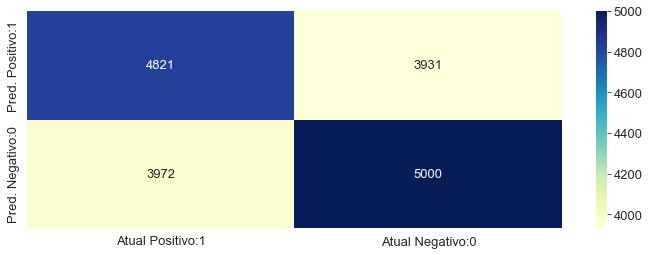


Model      : LightGBM
ROC - AUC  : 0.5778 
Accuracy   : 0.5775 
Precision  : 0.5780 
Recall     : 0.5775 
F1 - Score : 0.5773 
MAE        : 0.4225 
RMSE       : 0.6500 
R2         : -0.6904 

              precision    recall  f1-score   support

           0       0.57      0.60      0.58      8752
           1       0.59      0.55      0.57      8972

    accuracy                           0.58     17724
   macro avg       0.58      0.58      0.58     17724
weighted avg       0.58      0.58      0.58     17724


Matriz Confusão

 [[5264 3488]
 [4001 4971]]

V. Positivos(VP) =  5264
V. Negativos(VN) =  4971
F. Positivos(FP) =  3488
F. Negativos(FN) =  4001


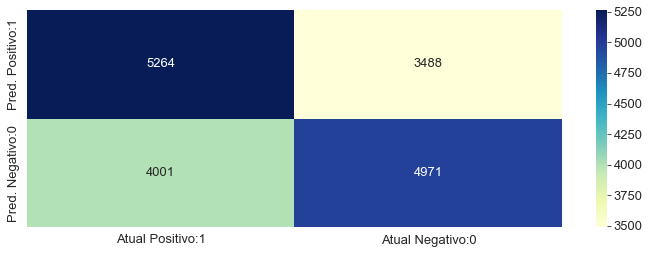


Model      : Logistic Regression
ROC - AUC  : 0.5746 
Accuracy   : 0.5746 
Precision  : 0.5746 
Recall     : 0.5746 
F1 - Score : 0.5746 
MAE        : 0.4254 
RMSE       : 0.6522 
R2         : -0.7019 

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      8752
           1       0.58      0.58      0.58      8972

    accuracy                           0.57     17724
   macro avg       0.57      0.57      0.57     17724
weighted avg       0.57      0.57      0.57     17724


Matriz Confusão

 [[5018 3734]
 [3806 5166]]

V. Positivos(VP) =  5018
V. Negativos(VN) =  5166
F. Positivos(FP) =  3734
F. Negativos(FN) =  3806


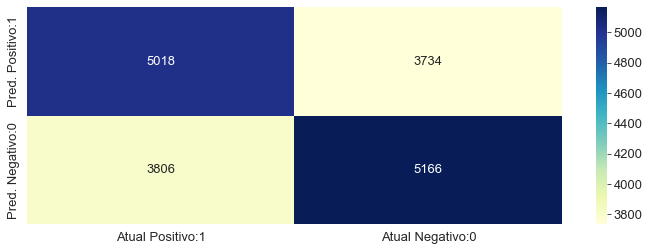


Model      : Naive Bayes Gaussian
ROC - AUC  : 0.5688 
Accuracy   : 0.5676 
Precision  : 0.5717 
Recall     : 0.5676 
F1 - Score : 0.5637 
MAE        : 0.4324 
RMSE       : 0.6575 
R2         : -0.7297 

              precision    recall  f1-score   support

           0       0.55      0.67      0.60      8752
           1       0.59      0.47      0.53      8972

    accuracy                           0.57     17724
   macro avg       0.57      0.57      0.56     17724
weighted avg       0.57      0.57      0.56     17724


Matriz Confusão

 [[5824 2928]
 [4735 4237]]

V. Positivos(VP) =  5824
V. Negativos(VN) =  4237
F. Positivos(FP) =  2928
F. Negativos(FN) =  4735


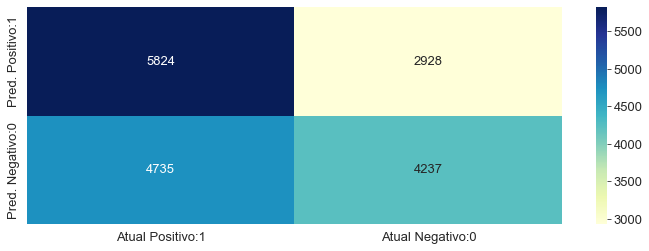


Model      : Stochastic Gradient Descent Classifier
ROC - AUC  : 0.5490 
Accuracy   : 0.5495 
Precision  : 0.5494 
Recall     : 0.5495 
F1 - Score : 0.5487 
MAE        : 0.4505 
RMSE       : 0.6712 
R2         : -0.8021 

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      8752
           1       0.55      0.59      0.57      8972

    accuracy                           0.55     17724
   macro avg       0.55      0.55      0.55     17724
weighted avg       0.55      0.55      0.55     17724


Matriz Confusão

 [[4423 4329]
 [3655 5317]]

V. Positivos(VP) =  4423
V. Negativos(VN) =  5317
F. Positivos(FP) =  4329
F. Negativos(FN) =  3655


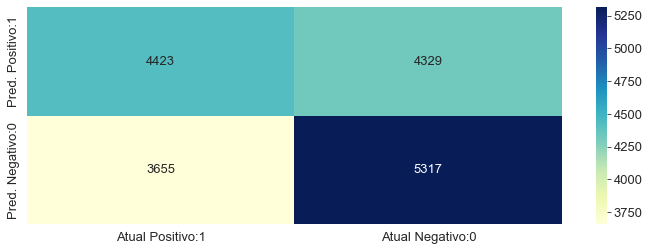

In [48]:
# Matriz de confusão

test_models_plot_confusion_matrix(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)


---

**Conclusões:** 

O processo de matriz de confusão destaca 2 modelos onde apresentam resultados similares, a acurácia são iguais, mas optamos em utilizar o modelo que apresentou a melhor métrica no ROC-UAC.<br>



**<center>GradientBoostingClassifier</center>**

|  | precision | recall | f1-score | support |
| -: | -: | -: | -: | -: |
| 0 | 0.57 | 0.60 | 0.59 | 8752 |
| 1 | 0.59 | 0.56 | 0.58 | 8972 |
|    accuracy |  |  | 0.58 | 17724
|   macro avg | 0.58 | 0.58 | 0.58 | 17724
|weighted avg | 0.58 | 0.58 | 0.58 | 17724

<br>

**<center>AdaBoost</center>**

|  | precision | recall | f1-score | support |
| -: | -: | -: | -: | -: |
| 0 | 0.58 | 0.56 | 0.57 | 8752 |
| 1 | 0.58 | 0.60 | 0.59 | 8972 |
|    accuracy |  |  | 0.58 | 17724
|   macro avg | 0.58 | 0.58 | 0.58 | 17724
|weighted avg | 0.58 | 0.58 | 0.58 | 17724




### Modelo escolhido - GradientBoostingClassifier

In [49]:
# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# A escolha do modelo foi baseado na pontuação ROC - AUC
model = GradientBoostingClassifier(random_state=random_seed)

# Treinando o modelo com os conjuntos de dados de treinamento equalizados (RandomOverSampler)
model.fit(X_train, y_train)

# Previsão de saída para o conjunto de dados de teste
y_pred = model.predict(X_test)


In [50]:
# Calculando a pontuação 
score=[]

score.append(['f1_score', 'Model', f1_score(y_test, y_pred)])
score.append(['roc_auc_score', 'Model', metrics.roc_auc_score(y_test, y_pred)])
score.append(['accuracy', 'Model', accuracy_score(y_test, y_pred)])

### Técnicas de Balanceamento

#### Aplicando **OverSampling**:

In [51]:
# Instanciando RandomOverSampler com a estratégia de equilibrar a classe minoritária

oversample = RandomOverSampler(sampling_strategy='minority', random_state=random_seed)


In [52]:
# Adequando as novas classes para treino

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)


In [53]:
# Quantidade "original" separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


0    20400
1    20953
Name: covid_res, dtype: int64

In [54]:
# Quantidade "equalizada" com técnica de balanceamento para o conjunto de treino 
# note que a classe minoritária ficou com a mesma quantidade de elementos

y_train_ov.value_counts().sort_index()


0    20953
1    20953
Name: covid_res, dtype: int64

In [55]:
# Treinando o modelo com os conjuntos de dados de treinamento equalizados (RandomOverSampler)

model.fit(X_train_ov, y_train_ov)


GradientBoostingClassifier(random_state=42)

In [56]:
# Previsão de saída para o conjunto de dados de teste

y_pred_ov = model.predict(X_test)


In [57]:
# Calculando a pontuação 

score.append(['f1_score', 'RandomOverSampler', f1_score(y_test, y_pred_ov)])
score.append(['roc_auc_score', 'RandomOverSampler', metrics.roc_auc_score(y_test, y_pred_ov)])
score.append(['accuracy', 'RandomOverSampler', accuracy_score(y_test, y_pred_ov)])


#### Aplicando o _UnderSampling_:

In [58]:
# Instanciando RandomUnderSampler com a estratégia de equilibrar a classe majoritária

undersample = RandomUnderSampler(sampling_strategy='majority', random_state=random_seed)


In [59]:
# Adequando as novas classes para treino

X_train_un, y_train_un = undersample.fit_resample(X_train, y_train)


In [60]:
# Quantidade "original" separada para o conjunto de treino inicial

y_train.value_counts().sort_index()


0    20400
1    20953
Name: covid_res, dtype: int64

In [61]:
# Quantidade "equalizada" com técnica de balanceamento para o conjunto de treino 
# note que a classe majoritária ficou com a mesma quantidade de elementos

y_train_un.value_counts().sort_index()


0    20400
1    20400
Name: covid_res, dtype: int64

In [62]:
# Treinando o modelo com os conjuntos de dados de treinamento equalizados (RandomUnderSampler)

model.fit(X_train_un, y_train_un)


GradientBoostingClassifier(random_state=42)

In [63]:
# Previsão de saída para o conjunto de dados de teste

y_pred_un = model.predict(X_test)


In [64]:
# Calculando a pontuação 

score.append(['f1_score', 'RandomUnderSampler', f1_score(y_test, y_pred_un)])
score.append(['roc_auc_score', 'RandomUnderSampler', metrics.roc_auc_score(y_test, y_pred_un)])
score.append(['accuracy', 'RandomUnderSampler', accuracy_score(y_test, y_pred_un)])


#### Aplicando o SMOTE

In [65]:
# Instanciando SMOTE

smote = SMOTE(random_state=random_seed)


In [66]:
# Adequando as novas classes para treino

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [67]:
# Quantidade "original" separada para o conjunto de treino inicial

y_train.value_counts()


1    20953
0    20400
Name: covid_res, dtype: int64

In [68]:
# Quantidade "equalizada" com técnica de balanceamento para o conjunto de treino 
# note que a classe majoritária ficou com a mesma quantidade de elementos

y_train_sm.value_counts()


0    20953
1    20953
Name: covid_res, dtype: int64

In [69]:
# Treinando o modelo com os conjuntos de dados de treinamento equalizados (SMOTE)

model.fit(X_train_sm, y_train_sm)


GradientBoostingClassifier(random_state=42)

In [70]:
# Previsão de saída para o conjunto de dados de teste

y_pred_sm = model.predict(X_test)


In [71]:
# Calculando a pontuação 

score.append(['f1_score', 'SMOTE', f1_score(y_test, y_pred_sm)])
score.append(['roc_auc_score', 'SMOTE', metrics.roc_auc_score(y_test, y_pred_sm)])
score.append(['accuracy', 'SMOTE', accuracy_score(y_test, y_pred_sm)])


#### Análise 

In [72]:
# Conmparação das pontuações após técnicas de balanceamento
# Ordenando a pontuação
score.sort(key = lambda y:y[2],reverse =True)

# Exibindo a pontuação
print("Comparação das Pontuações: ")
score


Comparação das Pontuações: 


[['roc_auc_score', 'Model', 0.5853048250457854],
 ['accuracy', 'Model', 0.5849695328368314],
 ['roc_auc_score', 'SMOTE', 0.5840468233081022],
 ['roc_auc_score', 'RandomUnderSampler', 0.5838924225765147],
 ['accuracy', 'RandomUnderSampler', 0.5832204919882645],
 ['accuracy', 'SMOTE', 0.5831640713157301],
 ['roc_auc_score', 'RandomOverSampler', 0.5828699952971707],
 ['accuracy', 'RandomOverSampler', 0.5821484992101106],
 ['f1_score', 'Model', 0.5766087256820537],
 ['f1_score', 'RandomUnderSampler', 0.5627182856804595],
 ['f1_score', 'RandomOverSampler', 0.5597431934371656],
 ['f1_score', 'SMOTE', 0.554725168756027]]

---

**Conclusão**

Utilizando técnicas de balanceamento não foi possível melhorar a predição do modelo.


### Visualização de Dados com Interpretabilidade do Modelo

Avaliação do impacto de uma determinada variável em comparação a previsão e como essas variáveis influenciam nas predições.
 

#### SHAP

In [73]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap_obj = explainer(X_train)

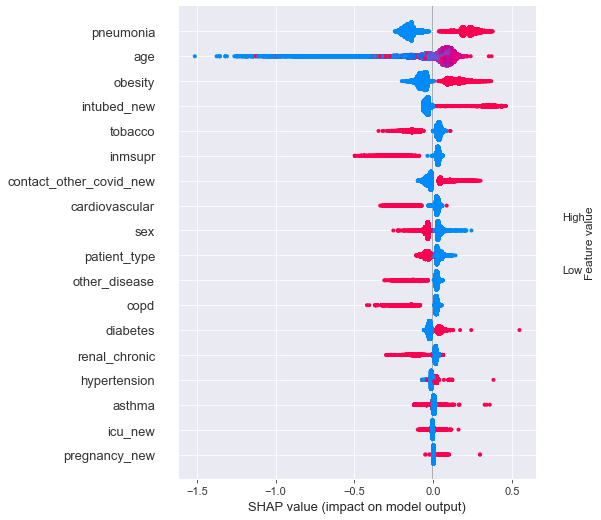

In [74]:
shap.summary_plot(shap_values, X_train)

#### GradientBoostingClassifier


Relatório do Modelo GradientBoostingClassifier(random_state=42)

Acuracia : 0.588
AUC Score (Train): 0.588320
CV Score : Mean - 0.6141677 | Std - 0.0106643 | Min - 0.5974912 | Max - 0.6294704


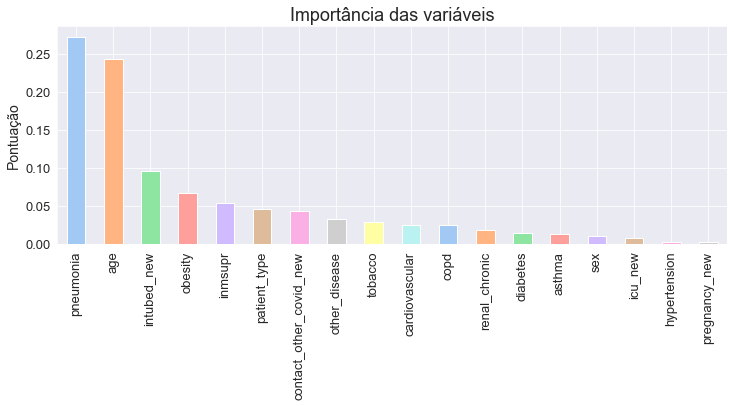

In [75]:
#Verificando a importância das variáveis no modelo

target = 'covid_res'
predictors = [x for x in dfc.columns if x not in [target]]
modelfit(model, dfc, predictors, target)


## Otimização do Modelo 

A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);


#### Definições básicas dos parametros do modelo

In [76]:
# Definições do modelo 
pprint(model)

# Parâmetros do modelo
print("")
pprint(model.get_params())


GradientBoostingClassifier(random_state=42)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


Vamos entender o significado dos parâmetros que vamos mexer:

**n_estimators** : 
    São o número de árvores utilizada na floresta aleatória;<br>

**min_samples_split** : 
    Define o número mínimo de amostras (ou observações) que são necessárias em um nó para ser considerado para divisão.
    Usado para controlar o sobreajuste. Valores mais altos evitam que um modelo aprenda relações que podem ser altamente específicas para a amostra particular selecionada para uma árvore.
        
**min_samples_leaf** :
    Define as amostras mínimas (ou observações) necessárias em um nó terminal ou folha.
    Usado para controlar o sobreajuste semelhante a min_samples_split.
    Geralmente, valores mais baixos devem ser escolhidos para problemas de classe desequilibrada porque as regiões em que a classe minoritária estará em maioria serão muito pequenas.

**max_depth** :
    A profundidade máxima de uma árvore.
    Usado para controlar o sobreajuste, uma vez que a profundidade mais alta permitirá que o modelo aprenda relações muito específicas para uma amostra particular.
        
**max_features** :
    O número de recursos a serem considerados ao pesquisar a melhor divisão. Eles serão selecionados aleatoriamente.
    Como regra geral, a raiz quadrada do número total de recursos funciona bem, mas devemos verificar até 30-40% do número total de recursos.
    Valores mais altos podem levar ao sobreajuste, mas dependem de caso para caso.




---


**Abordagem geral para ajuste de parâmetro**

Vamos focar em 2 tipos de parâmetros a serem ajustados - parâmetros baseados em árvore e parâmetros de reforço. 

À medida que reduzimos a taxa de aprendizado e aumentamos as árvores, a computação se torna cara e demora muito para ser executada em computadores pessoais, dessa forma estamos limitando os ajustes para que o notebook fique funcional e apresente as técnicas demonstradas em aula.


#### Aplicando **GridSearchCV**


In [77]:
# Definindo as variáveis target e as variáveis para predição, serã utilizadas para separar as classes de treino e teste

target = 'covid_res'
predictors = [x for x in dfc.columns if x not in [target]]


In [78]:
%%time

# Definindo valores iniciais para ajuste de parametro de reforço
model = GradientBoostingClassifier(learning_rate=0.1, 
                                   min_samples_split=500, 
                                   min_samples_leaf=50, 
                                   max_depth=8, 
                                   max_features='sqrt', 
                                   subsample=0.8, 
                                   random_state=random_seed)

# Testando valores de 10 a 200 em etapas de 10.
param_test1 = {'n_estimators':range(10,201,10)}

# Instanciando GridSearchCV com a variação dos parametros 
gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring='roc_auc', cv = 3, verbose = 2, n_jobs = -1)

# Treinando o modelo com os conjuntos de dados
gsearch1.fit(dfc[predictors], dfc[target])

# Apresetação dos melhores parametros e melhor resultado
gsearch1.best_params_, gsearch1.best_score_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Wall time: 37.4 s


({'n_estimators': 20}, 0.6150943264213898)

---

**Conclusões**

O melhor parametro que obtivemos foi 20 como estimadores para a taxa de aprendizado, esse valor pode variar devido as parametrizações utilizas (ex: cv). 

Se os valores forem muito altos ~ 100, o ajuste dos outros parâmetros levará muito tempo e você pode tentar uma taxa de aprendizagem mais alta.

In [79]:
%%time

# Definindo valores para ajuste de parametro de árvore
model = GradientBoostingClassifier(learning_rate=0.1, 
                                   n_estimators=20, # melhor resultado obtido em gsearch1
                                   max_features='sqrt', 
                                   subsample=0.8, 
                                   random_state=random_seed)

# Testando valores max_depth de 5 a 35 em etapas de 2 e min_samples_split de 200 a 2000 em etapas de 200.
param_test2 = {'max_depth':range(5,37,2), 'min_samples_split':range(200,2001,200)}

gsearch2 = GridSearchCV(estimator = model, param_grid = param_test2, scoring='roc_auc', cv = 3, verbose = 2, n_jobs = -1)
gsearch2.fit(dfc[predictors], dfc[target])

gsearch2.best_params_, gsearch2.best_score_


Fitting 3 folds for each of 160 candidates, totalling 480 fits
Wall time: 54 s


({'max_depth': 7, 'min_samples_split': 400}, 0.6159208869541969)

---

**Conclusões**

O melhor parametro que obtivemos foi 7 para max_depth e 400 para mim_samples_splits como estimadores para a taxa de aprendizado. 

Além disso, podemos ver a pontuação do CV aumentando.


In [80]:
%%time

# Definindo valores iniciais para ajuste de parametro de árvore
model = GradientBoostingClassifier(learning_rate=0.1, 
                                   n_estimators=20,  # melhor resultado obtido em gsearch1
                                   max_depth=7,  # melhor resultado obtido em gsearch2
                                   min_samples_split=400,  # melhor resultado obtido em gsearch2
                                   max_features='sqrt', 
                                   subsample=0.8, 
                                   random_state=random_seed)

# Testando valores min_samples_leaf de 10 a 100 em etapas de 10.
param_test3 = {'min_samples_leaf':range(10,101,10)}

gsearch3 = GridSearchCV(estimator = model, param_grid = param_test3, scoring='roc_auc', cv = 3, verbose = 2, n_jobs = -1)
gsearch3.fit(dfc[predictors], dfc[target])

gsearch3.best_params_, gsearch3.best_score_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 3.58 s


({'min_samples_leaf': 30}, 0.6164222212888232)

---

**Conclusões**

O melhor parametro que obtivemos foi 30 para min_samples_leaf como estimadores para a taxa de aprendizado. 


In [81]:
%%time

# Definindo valores iniciais para ajuste de parametro de árvore
model = GradientBoostingClassifier(learning_rate=0.1, 
                                   n_estimators=20,  # melhor resultado obtido em gsearch1
                                   max_depth=7,  # melhor resultado obtido em gsearch2
                                   min_samples_split=400,  # melhor resultado obtido em gsearch2
                                   min_samples_leaf=30, # melhor resultado obtido em gsearch3
                                   subsample=0.8, 
                                   random_state=random_seed)

# Testando valores max_features de 1 a 50 em etapas de 1.
param_test4 = {'max_features':range(1,51,1)}

gsearch4 = GridSearchCV(estimator = model, param_grid = param_test4, scoring='roc_auc', cv = 3, verbose = 2, n_jobs = -1)
gsearch4.fit(dfc[predictors], dfc[target])

gsearch4.best_params_, gsearch4.best_score_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Wall time: 8.63 s


({'max_features': 4}, 0.6164222212888232)

---

**Conclusões**

O melhor parametro que obtivemos foi 4 para max_features como estimadores para a taxa de aprendizado. 


In [82]:
%%time

# Definindo valores iniciais para ajuste de parametro de árvore
model = GradientBoostingClassifier(learning_rate=0.1, 
                                   n_estimators=30,  # melhor resultado obtido em gsearch1
                                   max_depth=7,  # melhor resultado obtido em gsearch2
                                   min_samples_split=1200,  # melhor resultado obtido em gsearch2
                                   min_samples_leaf=10, # melhor resultado obtido em gsearch3
                                   max_features=4, # melhor resultado obtido em gsearch4
                                   random_state=random_seed)

# Testando valores subsample, ajustando a subamostra e criando modelos com menor taxa de aprendizagem
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch5 = GridSearchCV(estimator = model, param_grid = param_test5, scoring='roc_auc', cv = 3, verbose = 2, n_jobs = -1)
gsearch5.fit(dfc[predictors], dfc[target])

gsearch5.best_params_, gsearch5.best_score_


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 3.13 s


({'subsample': 0.8}, 0.6165832601979685)

---

**Conclusões**

O melhor parametro que obtivemos foi 0.8 para subsample como estimadores para a taxa de aprendizado. 



Relatório do Modelo GradientBoostingClassifier(max_depth=7, max_features=4, min_samples_leaf=10,
                           min_samples_split=1200, n_estimators=30,
                           random_state=42, subsample=0.8)

Acuracia : 0.5878
AUC Score (Train): 0.588372
CV Score : Mean - 0.6146857 | Std - 0.01162351 | Min - 0.5978276 | Max - 0.6329249
Wall time: 3.89 s


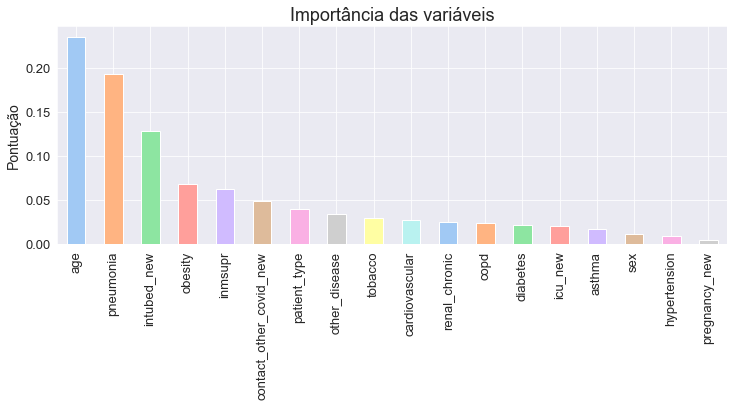

In [83]:
%%time

# Definindo valores dos parametros conforme indicações dos melhores resultados
model = GradientBoostingClassifier(learning_rate = 0.1, 
                                   n_estimators = 30,  # melhor resultado obtido em gsearch1
                                   max_depth = 7,  # melhor resultado obtido em gsearch2
                                   min_samples_split = 1200,  # melhor resultado obtido em gsearch2
                                   min_samples_leaf = 10, # melhor resultado obtido em gsearch3
                                   max_features = 4, # melhor resultado obtido em gsearch4
                                   subsample = 0.8,  # melhor resultado obtido em gsearch5
                                   random_state=random_seed)

# Treinando o modelo com os conjuntos de dados
# Verificando a importância das variáveis no modelo após validação de parametros

modelfit(model, dfc, predictors, target)



---

**Conclusões**

Comparando a importância dos recursos deste modelo com o modelo base, notamos que algumas variáveis trocaram de posição, pois se tornaram mais relevante para a tomada de decisão do modelo, antes o modelo dava maior importância para outras variáveis.



---

**Processando os modelos alterando os parametros de aprendizagem e estimadores (Tunning)**




Relatório do Modelo GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=120, random_state=42, subsample=0.8)

Acuracia : 0.5992
AUC Score (Train): 0.599211
CV Score : Mean - 0.6003516 | Std - 0.01735613 | Min - 0.5687154 | Max - 0.6160549
Wall time: 15.1 s


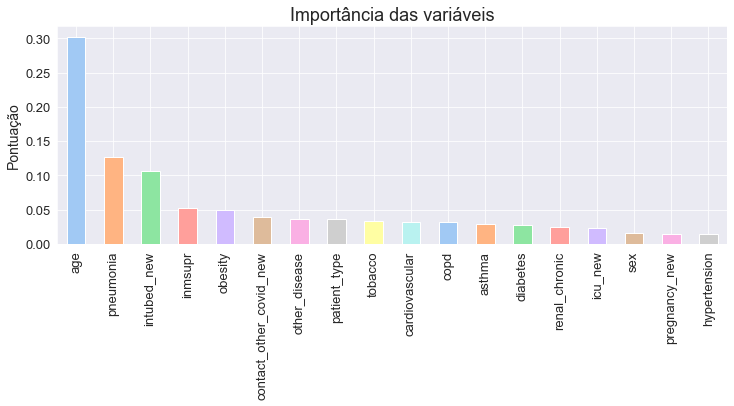

In [84]:
%%time

# Definindo do modelo 
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.2, 
                                         n_estimators=120,        
                                         max_depth=7,             # melhor resultado obtido em gsearch2
                                         min_samples_split=1200,  # melhor resultado obtido em gsearch2
                                         min_samples_leaf=10,     # melhor resultado obtido em gsearch3
                                         max_features=4,          # melhor resultado obtido em gsearch4
                                         subsample=0.8,           # melhor resultado obtido em gsearch5
                                         random_state=random_seed)

modelfit(gbm_tuned_1, dfc, predictors, target)



Relatório do Modelo GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=600, random_state=42, subsample=0.8,
                           warm_start=True)

Acuracia : 0.6014
AUC Score (Train): 0.601477
CV Score : Mean - 0.5983669 | Std - 0.0191023 | Min - 0.5621061 | Max - 0.6148834
Wall time: 1min 14s


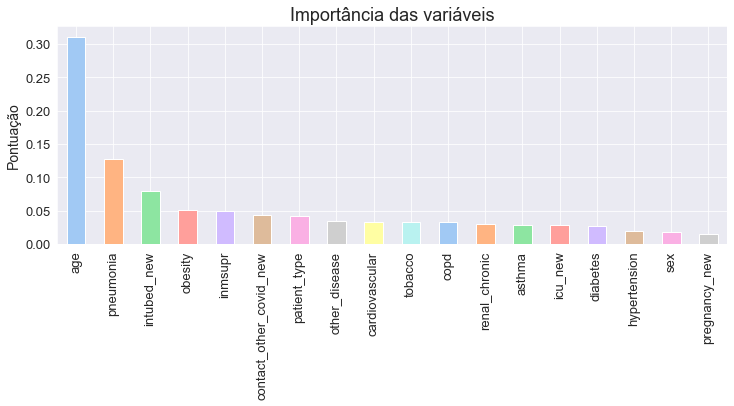

In [85]:
%%time

# Definindo do modelo
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.05, 
                                         n_estimators=600,        
                                         max_depth=7,             # melhor resultado obtido em gsearch2
                                         min_samples_split=1200,  # melhor resultado obtido em gsearch2
                                         min_samples_leaf=10,     # melhor resultado obtido em gsearch3
                                         max_features=4,          # melhor resultado obtido em gsearch4
                                         subsample=0.8,           # melhor resultado obtido em gsearch5
                                         warm_start=True,
                                         random_state=random_seed)

modelfit(gbm_tuned_2, dfc, predictors, target)



Relatório do Modelo GradientBoostingClassifier(max_depth=7, max_features=4, min_samples_leaf=10,
                           min_samples_split=1200, n_estimators=2000,
                           random_state=42, subsample=0.8, warm_start=True)

Acuracia : 0.6263
AUC Score (Train): 0.626225
CV Score : Mean - 0.5583629 | Std - 0.03014424 | Min - 0.4997309 | Max - 0.5831289
Wall time: 4min 7s


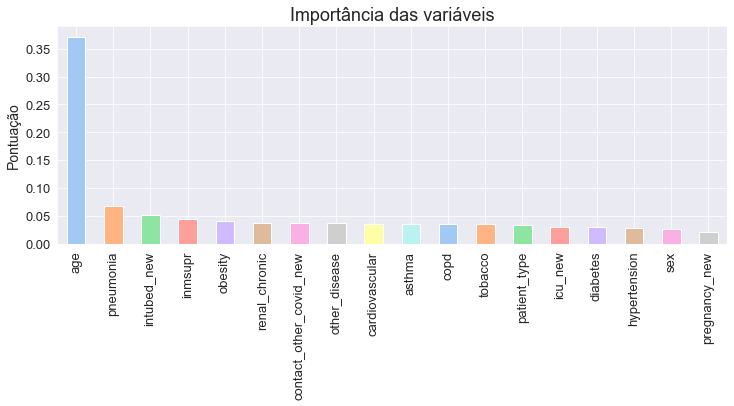

In [86]:
%%time

# Definindo do modelo 
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.1, 
                                         n_estimators=2000,        
                                         max_depth=7,             # melhor resultado obtido em gsearch2
                                         min_samples_split=1200,  # melhor resultado obtido em gsearch2
                                         min_samples_leaf=10,     # melhor resultado obtido em gsearch3
                                         max_features=4,          # melhor resultado obtido em gsearch4
                                         subsample=0.8,           # melhor resultado obtido em gsearch5
                                         warm_start=True,
                                         random_state=random_seed)

modelfit(gbm_tuned_3, dfc, predictors, target)



Relatório do Modelo GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=2000, random_state=42, subsample=0.8,
                           warm_start=True)

Acuracia : 0.6378
AUC Score (Train): 0.637701
CV Score : Mean - 0.5409638 | Std - 0.02970711 | Min - 0.4838303 | Max - 0.5630645
Wall time: 4min 6s


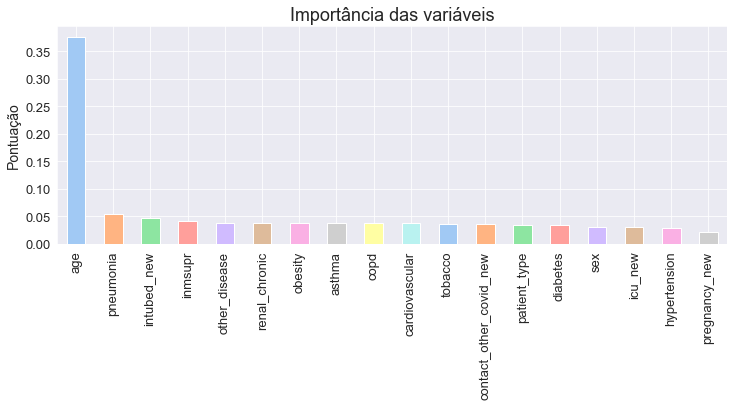

In [87]:
%%time

# Definindo do modelo 
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.2, 
                                         n_estimators=2000,        
                                         max_depth=7,             # melhor resultado obtido em gsearch2
                                         min_samples_split=1200,  # melhor resultado obtido em gsearch2
                                         min_samples_leaf=10,     # melhor resultado obtido em gsearch3
                                         max_features=4,          # melhor resultado obtido em gsearch4
                                         subsample=0.8,           # melhor resultado obtido em gsearch5
                                         warm_start=True,
                                         random_state=random_seed)

modelfit(gbm_tuned_4, dfc, predictors, target)


---

**Conclusões**

Os processamentos acima nos mostram que alterando a taxa de aprendizado e estimadores conseguimos melhorar a acurácia e AUC, note que as variáveis estão mais "balanceadas" e trocaram de posição devido ao grau de importância.

Dessa forma concluimos que encontrar os melhores parametros para o modelo são fundamentais para aperfeiçoar a predição.


In [88]:
# Definindo o modelo com os melhores resultados
model_tuned = gbm_tuned_4

# Treinando o modelo com os conjuntos de dados
model_tuned.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=2000, random_state=42, subsample=0.8,
                           warm_start=True)


Model      : GradientBoosting
ROC - AUC  : 0.6349 
Accuracy   : 0.6350 
Precision  : 0.6350 
Recall     : 0.6350 
F1 - Score : 0.6350 
MAE        : 0.3650 
RMSE       : 0.6041 
R2         : -0.4602 

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      8752
           1       0.64      0.64      0.64      8972

    accuracy                           0.64     17724
   macro avg       0.63      0.63      0.63     17724
weighted avg       0.64      0.64      0.64     17724


Matriz Confusão

 [[5506 3246]
 [3223 5749]]

V. Positivos(VP) =  5506
V. Negativos(VN) =  5749
F. Positivos(FP) =  3246
F. Negativos(FN) =  3223


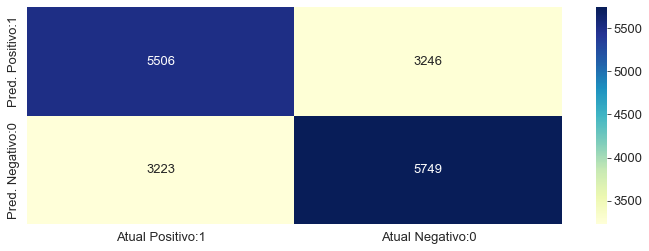

In [89]:
# Matriz de confusão
list_models = [
{'model_name': 'GradientBoosting',
 'estimator' : model_tuned}
]

test_models_plot_confusion_matrix(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)


#### Aplicando **RandomizedSearchCV**

In [90]:
%%time

model_rs = GradientBoostingClassifier(random_state=random_seed)

params_rs = {'learning_rate': [0.05, 0.1, 0.2],
               'n_estimators': range(10,201,10),
               'max_depth': range(5,37,2), 
               'min_samples_split': range(200,2001,200),
               'min_samples_leaf': range(10,101,10),
               'max_features': range(1,51,1),
               'subsample': [0.6,0.7,0.75,0.8,0.85,0.9]
              }

# Instanciando RandomizedSearchCV com a variação dos parametros 
random_search = RandomizedSearchCV(estimator = model_rs, 
                                   param_distributions = params_rs,
                                   scoring='roc_auc',
                                   n_iter = 100, 
                                   cv = 3, 
                                   verbose=2, 
                                   n_jobs = -1)

# Treinando o modelo com os conjuntos de dados
random_search.fit(dfc[predictors], dfc[target])

# Apresetação dos melhores parametros e melhor resultado
random_search.best_params_, gsearch2.best_score_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 1min 28s


({'subsample': 0.7,
  'n_estimators': 30,
  'min_samples_split': 2000,
  'min_samples_leaf': 50,
  'max_features': 6,
  'max_depth': 7,
  'learning_rate': 0.05},
 0.6159208869541969)


Relatório do Modelo GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features=6,
                           min_samples_leaf=50, min_samples_split=2000,
                           n_estimators=30, random_state=42, subsample=0.7)

Acuracia : 0.5847
AUC Score (Train): 0.585280
CV Score : Mean - 0.6110198 | Std - 0.01277214 | Min - 0.5934759 | Max - 0.6316495
Wall time: 4.18 s


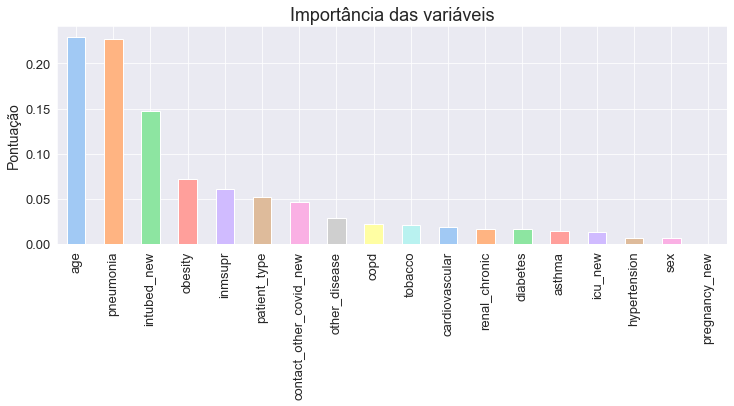

In [91]:
%%time

modelfit(random_search.best_estimator_, dfc, predictors, target)


In [92]:
# Definindo o modelo 
model_rs = random_search.best_estimator_

# Treinando o modelo com os conjuntos de dados
model_rs.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features=6,
                           min_samples_leaf=50, min_samples_split=2000,
                           n_estimators=30, random_state=42, subsample=0.7)


Model      : GradientBoosting
ROC - AUC  : 0.5815 
Accuracy   : 0.5808 
Precision  : 0.5825 
Recall     : 0.5808 
F1 - Score : 0.5796 
MAE        : 0.4192 
RMSE       : 0.6475 
R2         : -0.6771 

              precision    recall  f1-score   support

           0       0.57      0.64      0.60      8752
           1       0.60      0.53      0.56      8972

    accuracy                           0.58     17724
   macro avg       0.58      0.58      0.58     17724
weighted avg       0.58      0.58      0.58     17724


Matriz Confusão

 [[5559 3193]
 [4237 4735]]

V. Positivos(VP) =  5559
V. Negativos(VN) =  4735
F. Positivos(FP) =  3193
F. Negativos(FN) =  4237


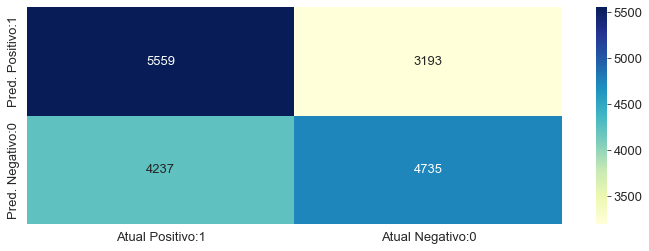

In [93]:

# Matriz de confusão
list_models = [
{'model_name': 'GradientBoosting',
 'estimator' : model_rs}
]

test_models_plot_confusion_matrix(list_models,
                              "model_name",
                              "estimator",
                              X_train,
                              X_test,
                              y_train,
                              y_test)


---

**Conclusões**

Comparando GridSearchCV e RandomizedSearchCV utilizando os mesmos parametros notamos que os valores do GridSearchCV foram melhores.


#### Aplicando valores de threshold

In [94]:
# Criando o predict proba para a base de teste

y_proba_test = model_tuned.predict_proba(X_test)
y_proba_test


array([[0.64702067, 0.35297933],
       [0.49100822, 0.50899178],
       [0.30376315, 0.69623685],
       ...,
       [0.52456035, 0.47543965],
       [0.33840135, 0.66159865],
       [0.52565054, 0.47434946]])

In [95]:
# trazer a resposta para junto das probabilidades
results_test = pd.DataFrame(y_test)

# Pegando a probabilidade em estar com COVID (classe 1)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

In [96]:
# Criando um dataframe com a probabilidade da classe 1 e a marcação de target (covid_res)
results_test.rename(columns={"covid_res": "target"}, inplace = True)
results_test.head()

,target,proba
236084,0,0.353
377157,0,0.509
78498,1,0.696
3331,1,0.512
150969,1,0.667


In [97]:
# Parâmetros para o Looping

threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [98]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['target'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['target'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['target'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['target'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [99]:
# Avaliando os resultados
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,16,0,8736,8972,0.5067,1.0000,0.5071,0.6726
1,0.04,44,0,8708,8972,0.5075,1.0000,0.5087,0.6733
2,0.06,77,0,8675,8972,0.5084,1.0000,0.5106,0.6741
3,0.08,119,0,8633,8972,0.5096,1.0000,0.5129,0.6752
4,0.10,178,1,8574,8971,0.5113,0.9999,0.5162,0.6766
5,0.12,253,3,8499,8969,0.5135,0.9997,0.5203,0.6784
6,0.14,340,6,8412,8966,0.5159,0.9993,0.5251,0.6805
7,0.16,432,8,8320,8964,0.5186,0.9991,0.5301,0.6828
8,0.18,538,11,8214,8961,0.5217,0.9988,0.5359,0.6854
9,0.20,667,19,8085,8953,0.5255,0.9979,0.5428,0.6884


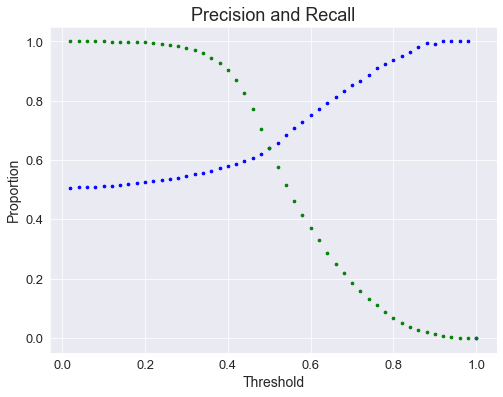

In [100]:
# Precison-Recall-Threshold Curve

# variavel de proporção para os gráficos
k = 2

# Define o tamanho da figura
fig = plt.figure(figsize = (k*4,k*3))

# Definindo a janela de plot
ax1 = fig.add_subplot(111)

# Scatter do Precision
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)

# Scatter do Recall
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)

# Configurações dos exiso
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Proportion')

# Cria titulo
plt.title("Precision and Recall")

# Mostra o gráfico
plt.show()

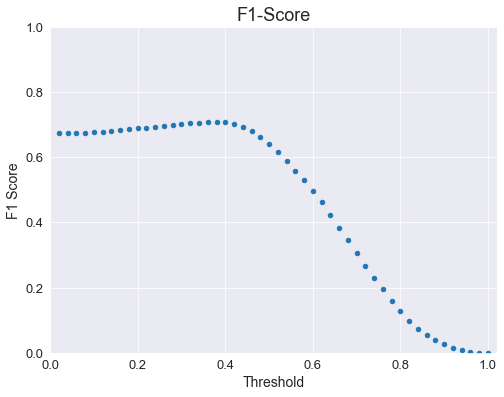

In [101]:
# Curva F1-Score

# Cria o plot
grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
# Configurações do gráfico
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))

# mostra o gráfico
plt.show()

In [102]:
# Cria a resposta com o novo threshold
y_pred_th = np.where(y_proba_test[:,1] >= 0.42, 1, 0)
y_pred_th

array([0, 1, 1, ..., 1, 1, 1])

Matriz Confusão

 [[3279 5473]
 [1182 7790]]

V. Positivos(VP) =  3279
V. Negativos(VN) =  7790
F. Positivos(FP) =  5473
F. Negativos(FN) =  1182


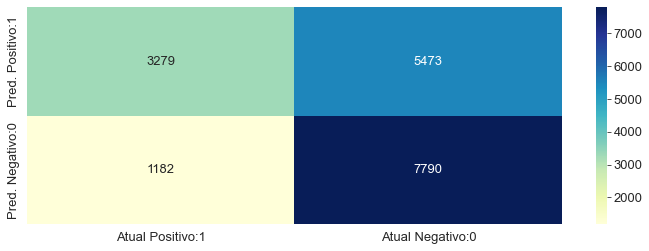

In [106]:
# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred_th)
cm_matrix = pd.DataFrame(data=cm, columns=['Atual Positivo:1', 'Atual Negativo:0'], 
                                 index=['Pred. Positivo:1', 'Pred. Negativo:0'])

print('Matriz Confusão\n\n', cm)
print('\nV. Positivos(VP) = ', cm[0,0])
print('V. Negativos(VN) = ', cm[1,1])
print('F. Positivos(FP) = ', cm[0,1])
print('F. Negativos(FN) = ', cm[1,0])

# Mostra o gráfico
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()



---

**Conclusões**

A defnição do threshould 


#### Processamento do dataframe com todos os pacientes


Relatório do Modelo GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=2000, random_state=42, subsample=0.8,
                           warm_start=True)

Acuracia : 0.6487
AUC Score (Train): 0.620300
CV Score : Mean - 0.6528905 | Std - 0.002298679 | Min - 0.6500688 | Max - 0.6569856
Wall time: 45min 57s


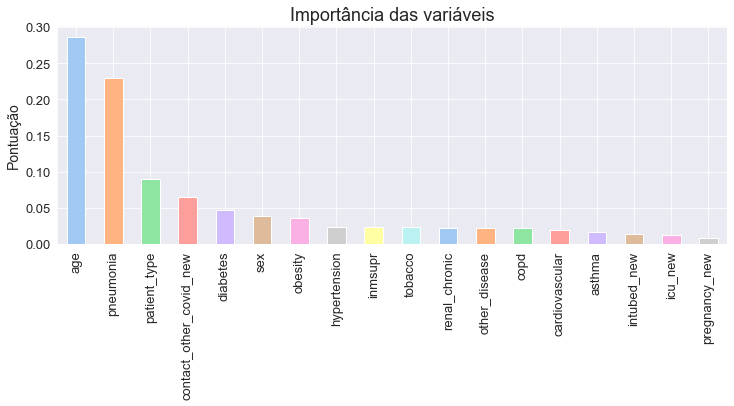

In [107]:
%%time

# Aplicando o modelo com os melhores parametros no dataframe com caracteristicas de pacientes duplicados
modelfit(model_tuned, dfc_copy, predictors, target)


## Conclusões sobre o Projeto

Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

In [128]:
%%time

# Exclusão de variáveis que inicialmente tratamos, mas indicavam uma grande quantidade de valores NaN e baseado 
# na avaliação acima indicam baixa relevância para o modelo.

# icu_new: Se o paciente precisou ser internado na UTI;
# intubed_new: Se o paciente foi intubado ou não;
# pregnancy_new: Se a paciente estava grávida ou não (para pacientes mulheres);

# Deleting columns
DeleteList=['pregnancy_new', 'icu_new', 'intubed_new']

# Novo dataframe 
dfc_copy = dfc_copy.drop(DeleteList, axis=1).copy()

# Reindexando os indices do dataframe
dfc_copy.reset_index(drop=True, inplace=True)

# Vamos dividir os nossos dados numa matriz X que contém as características a treinar, 
# e uma matriz y com a variável alvo, neste caso a coluna covid_res. 
X = dfc_copy.drop(['covid_res'], axis = 1)
y = dfc_copy['covid_res']

# Vamos dividir os dados num conjunto de Train e num conjunto de Test. 
# Iremos treinar o modelo no conjunto de treino e depois utilizaremos o conjunto de testes para avaliar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# A padronização de um conjunto de dados é um requisito comum a muitos estimadores de aprendizagem de máquinas: 
# podem comportar-se mal se as características individuais não se parecerem mais ou menos com dados distribuídos normalmente.
pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


# O gráfico acima indica o melhor modelo baseado na pontuação ROC - AUC
modeltt = GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4, min_samples_leaf=10, min_samples_split=1200, n_estimators=2000, random_state=42, subsample=0.8, warm_start=True)

# Treinando o modelo com os conjuntos de dados de treinamento equalizados (RandomOverSampler)
modeltt.fit(X_train, y_train)




Relatório do Modelo GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features=4,
                           min_samples_leaf=10, min_samples_split=1200,
                           n_estimators=2000, random_state=42, subsample=0.8,
                           warm_start=True)

Acuracia : 0.5724
AUC Score (Train): 0.546824
CV Score : Mean - 0.6522466 | Std - 0.002467835 | Min - 0.6488465 | Max - 0.6563547
Wall time: 38min 22s


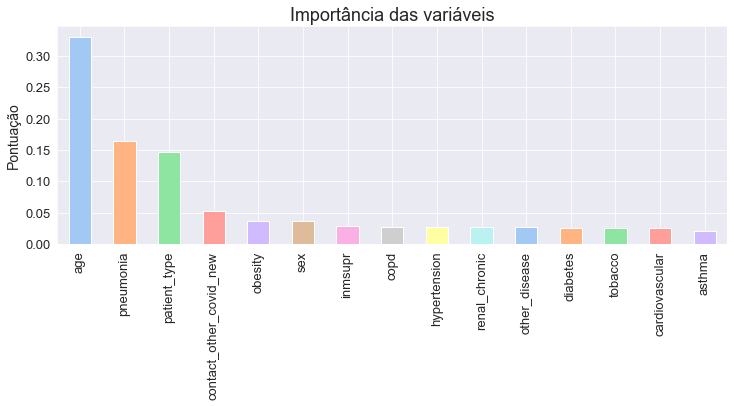

In [129]:
%%time

predictors = [x for x in dfc_copy.columns if x not in [target]]

# Aplicando o modelo com os melhores parametros no dataframe com caracteristicas de pacientes duplicados
modelfit(modeltt, dfc_copy, predictors, target)



---

**Conclusões:** 

Criamos um novo dataframe denominado dfc, retiramos as variáveis que definimos não ser relevantes para o modelo e excluimos todos os registros com valores faltantes, pois identificamos anteriormente que o percentual de valores faltantes eram mínimos.


Conforme apresentado no quadro acima de comparações de dataframes.